## <h1><center>  <font color='maroon'> “Time Series Analysis” to Forecast Crashes and Traffic Violations in Montgomery County, MD </font> </center></h1>


### DATA 205 – Capstone project
### by Meenakshi Nerolu     


### Table of Contents
* <b>[Introduction](#seca)</b>
* <b>[Data Understanding and Preparation](#sec1)</b>
    * [Datasets](#subsec_1_1)
    * [Questions to Research ](#subsec_1_2)
        * [Stage I](#subsec_1_2_1)
        * [Stage II](#subsec_1_2_2)
    * [Packages Used](#subsec_1_3)
* <b>[Traffic Violation](#sec2)</b>
    * [Reading "Traffic_Violations" data](#subsec_2_1)  
         * [Data Cleaning and Wrangling](#subsec_2_1_1)  
    * [Exploratory Data Analysis and Visualization](#subsec_2_2)
* <b> [Machine Learning Model](#sec2a) </b>
* <b>[Crash Reporting Incidents Data](#sec3)</b>
    * [Reading data](#subsec_3_1)
        * [Cleaning Data](#subsec_3_1_1)  
* <b>[Crash Reporting – Non-Motorists Data](#sec4)</b>
    * [Reading data](#subsec_4_1)
        * [Cleaning Data](#subsec_4_1_1) 
* <b>[Exploratory Data Analysis and Visualization (Motorists and Non-Motorists)](#sec5)</b>     
* <b>[Time Series Analysis (Motorists)](#sec6)</b>
* <b>[Acknowledgement](#sec7)</b>    

# <font color='blue'> Introduction <a class="anchor" id="seca"></a> </font>

# <font color='blue'> Data Understanding and Preparation <a class="anchor" id="sec1"></a> </font>

The objective of the project is to examine three datasets from [dataMontgomery](https://data.montgomerycountymd.gov/). One of the data sets is related traffic violation and other two is related to crash reporting data. 

## Data Sets <a class="anchor" id="subsec_1_1"></a>

<b> Trafic Violation  :  <a href = "https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q" URL> [Trafic Violation data]<!-- link to site --> </b>

> This dataset is updated daily and provides traffic violation information from all electronic traffic violations issued in the County.


<b> Crash Report :</b>

1.  <a href = "https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf" URL> [Crash Reporting Incident data]<!-- link to site -->
    
2. <a href = "https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fk-dce5" URL> [Crash Reporting-Non-Motorists data]<!-- link to site -->
    
    ## Questions to Research <a class="anchor" id="subsec_1_2"></a>

## Stage I <a class="anchor" id="subsec_1_2_1"></a>


<b>Dataset: </b> Traffic Violation
* How does number of violations change over year, month and season? Which month has the highest number of violations? Are    they consistent? 
* What days of the week had the highest number of violations and how do they change over the years?
* Who (race and gender) got the highest number of tickets? 
* Which color of the vehicle have the highest number of violations and did they contribute to accident?

<b>Dataset: </b> Crash Report (Motorists and Non-Motorists)
* How does number of crashes change over year, month and season? Which month has the highest number of violations? Are    they consistent?
* What days of the week had the highest number of crashes and how do they change over the years?
* What damage was caused due to the crash?
* What is the weather, surface and light conditiona when the most crashes occurred?



## Stage II <a class="anchor" id="subsec_1_2_2"></a>

### <b> Modeling and Interpretation </b> 
* Can we predict the following with a Machine Learning Model :
	* Binomial Classification:
		* Drivers that are male?
		* Violation that cased Personal Injury?
		* Violation Contributed to Accident ?
	* Multinominal Classification:
		* Violation Type?
        
### <b> Time-Series Analysis and Forecasting Number of Crashes</b> 

# <font color='blue'> Packages Used <a class="anchor" id="subsec_1_3"></a> </font>

### Data Wrangling
* **Numpy :** library meant for numerical computation
* **Pandas :** library for data manipulation and analysis

### Data Visualization
* **matplotlib :** 2D-plotting library
* **Seaborn :** data visualization library
* **geoplotlib :** visualizing geographical data
* **plotly**

### Machine Learning and Time Series
* Scikitlearn
* fbprophet

In [1]:
## import packages:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import pandas.util.testing as tm
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
#import plotly as py
import plotly
import pylab as pl
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools

#sklearn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.utils import resample
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import multilabel_confusion_matrix
import scikitplot as skplt

#Time-Series Analysis
import time
import datetime 
import dateutil
import statsmodels.api as sm
from dateutil.parser import parse
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot
sns_c = sns.color_palette(palette='deep')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from plot_metric.functions import BinaryClassification


from termcolor import colored
pl.rcParams['figure.figsize'] = (8, 8)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# <font color='blue'> 1. Traffic Violation <a class="anchor" id="sec2"></a> </font>

## Reading "Traffic_Violation" data <a class="anchor" id="subsec_2_1"></a>

Traffic Violation Data is downloaded from the url and hence is up-to-date.

In [2]:
    # Reading csv file
    #traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)

    ## Downloading & Reading csv file from website
    url = 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD'
    traffic = pd.read_csv(url,low_memory=False)

In [3]:
traffic.shape

(1695808, 43)

## Data Cleaning and Wrangling<a class="anchor" id="subsec_2_1_1"></a>

In the below coding, a function "useFeatures(traffic)" is defined and the following filters are done :

* Date and Time columns are converted to datetime format.
* New columns, viz., year, month, time, hour, week day and season are included.
* A new column *Violation* is included for counting purpose.

In [4]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(traffic):

    ## Formatting the Date
    ## Replace white space everywhere
    traffic.columns = traffic.columns.str.replace(' ', '')
    # Confirm the date column is in datetime format
    traffic['DateOfStop'] = pd.to_datetime(traffic['DateOfStop'])

    # Confirm the  time column is in datetime format
    traffic['TimeOfStop'] = pd.to_datetime(traffic['TimeOfStop'])
    # creating  new columns: date, year, month, day, time 
    traffic['date'] = pd.to_datetime(traffic['DateOfStop'])
    traffic['year'] = traffic['DateOfStop'].dt.year
    traffic['month'] = traffic['DateOfStop'].dt.month
    traffic['time'] = traffic['TimeOfStop'].dt.time
    traffic['hour'] = traffic['TimeOfStop'].dt.hour
    #traffic['day'] = traffic['DateOfStop'].dt.weekday_name
    traffic['day'] = traffic['DateOfStop'].dt.day_name()
    traffic = traffic.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    traffic = traffic[traffic.date >='01/01/2015']
    traffic = traffic[traffic.date <'12/16/2020']
    traffic = traffic.reset_index(drop=True)
    
    traffic['season']= "Fall"
    traffic.loc[(traffic['month'] < 3) | (traffic['month'] >= 12), "season"] = 'Winter'
    traffic.loc[(traffic['month'] < 6) & (traffic['month'] >= 3), "season"] = 'Spring'
    traffic.loc[(traffic['month'] < 9) & (traffic['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    traffic['Violation'] = pd.Series(1, index=traffic.index)
    
    return traffic

All the above features are stored in new data frame *traffic_features*.


In [5]:
# All the above features are stored in new data frame "traffic_features"
traffic_features = useFeatures(traffic)

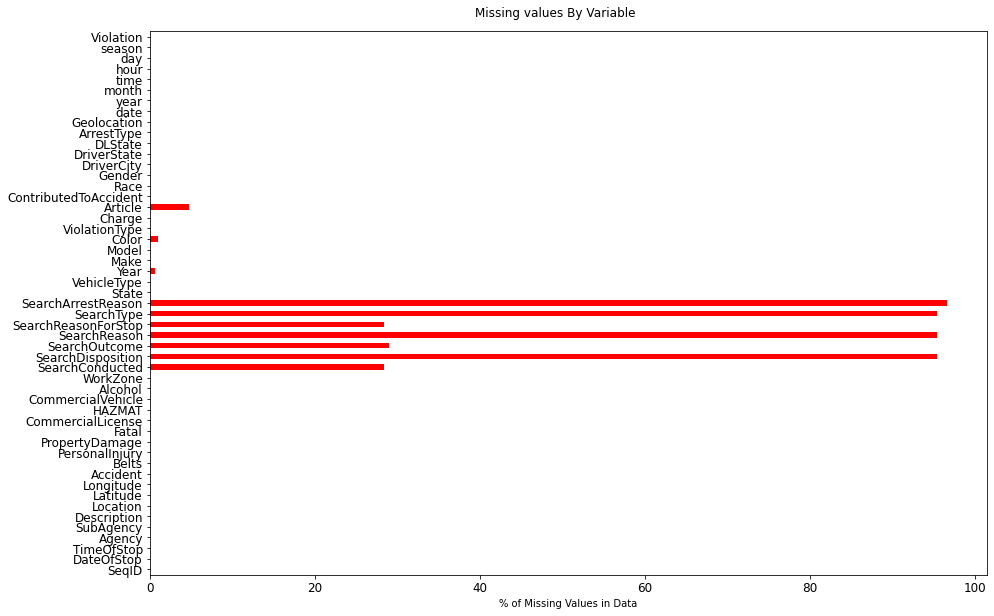

In [6]:
    missing_var = 100*traffic_features.isnull().sum()/traffic_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot1 = missing_var.plot(kind='barh',figsize=(15,10), grid = False,label="Percentage",color='red',fontsize=12)
    plot1.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=12,ha='center')
    plt.savefig('images/missing_var.jpg')
    # Add this loop to add the annotations

All 'Search' related variables have highest missing values and I dropped these columns. Further, features with 'Yes' and 'No' is replaced by binary number.

### Replace Yes or No by 0 

In [7]:
    ## Replace Yes and No by 1 and 0 respectively
traffic_replace = traffic_features.replace( {'Yes' : 1, 'No' : 0})
    
   
    ## replace the column name Year by Year_model
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
    
    # Delete the following columns as these columns have the highest number of NA's
delete_columns = traffic_replace[['SeqID', 'SearchConducted', 'SearchDisposition', 'SearchOutcome' , 'SearchReason', 'SearchReasonForStop', 'SearchType', 'SearchArrestReason']]
    
    # Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)

In [8]:
traffic_new["Color"].value_counts()

BLACK          240963
SILVER         207757
WHITE          183711
GRAY           137632
RED             85619
BLUE            81106
GREEN           31653
GOLD            31002
BLUE, DARK      24184
TAN             19494
MAROON          17535
BLUE, LIGHT     13236
BEIGE           11003
GREEN, DK        9664
GREEN, LGT       5334
BROWN            4687
YELLOW           3986
ORANGE           3746
BRONZE           2416
PURPLE           1947
MULTICOLOR        760
CREAM             553
COPPER            347
PINK              148
CHROME             30
CAMOUFLAGE         27
Name: Color, dtype: int64

Color of the car, viz., Green Lgt, Green dk etc. are repaced by standard colors like Green, Blue etc.

In [9]:
#rename the colors :
traffic_new = traffic_new.replace({"BLUE, DARK":"BLUE" , "BLUE, LIGHT":"BLUE", "GREEN, DK":"GREEN", "GREEN, LGT":"GREEN" })
traffic_new.head()
print("Size of the data frame : ", traffic_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", traffic_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", traffic_new.columns)

Size of the data frame :  (1130130, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130130 entries, 0 to 1130129
Columns: 43 entries, DateOfStop to Violation
dtypes: bool(1), datetime64[ns](3), float64(3), int64(14), object(22)
memory usage: 363.2+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')


All other NA's are replaced by 0.

### Grouping the time to determine the rush hour traffic.

In order to analyze the rush hour traffic, hours is categorized as follows: 
* "Morning Rush (6-10)", 
* "Day (10-12)", 
* "Lunch Rush (12-14)",
* "Afternoon (14-16)",
* "Evening" Rush (16-18)", 
* "Evening (18-22)",
* "Night (22-6)"

In [10]:
traffic_new['Rush_time']=traffic_new['TimeOfStop'].dt.hour
#create Rush Time by grouping

def rushhour(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [11]:
#apply function   
traffic_new['Rush_time']= traffic_new['Rush_time'].apply(rushhour)

In [12]:
#traffic_final = traffic_new.fillna(method='ffill')
traffic_final = traffic_new.fillna(0)
traffic_final .head()

DateOfStop          TimeOfStop Agency                    SubAgency  \
0 2015-01-01 2020-12-16 11:43:00    MCP  3rd District, Silver Spring   
1 2015-01-01 2020-12-16 10:24:00    MCP        4th District, Wheaton   
2 2015-01-01 2020-12-16 23:29:00    MCP        4th District, Wheaton   
3 2015-01-01 2020-12-16 00:57:00    MCP  3rd District, Silver Spring   
4 2015-01-01 2020-12-16 22:11:00    MCP       2nd District, Bethesda   

                                         Description  \
0  PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...   
1           DRIVER FAILURE TO STOP AT STOP SIGN LINE   
2  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...   
3  FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAM...   
4           DRIVER FAILURE TO STOP AT STOP SIGN LINE   

                           Location   Latitude  Longitude  Accident  Belts  \
0  NEW HAMPSHIRE AVE @ METZEROTT RD  39.004195 -76.980065         0      0   
1         BOWIE MILL RD / BRIARS RD  39.148653 -77.112565         0      0   
2       SB WICKHAM ROAD/BROOM DRIVE  39.156558 -77.093873         0      0   
3           COLESVILLE RD/SPRING ST  39.002607 -77.024447         0      0   
4    MACARTHUR BLVD AND OBERLIN AVE  38.961388 -77.133508         0      0   

   ...                            Geolocation       date  year  month  \
0  ...                (39.004195, -76.980065) 2015-01-01  2015      1   
1  ...         (39.1486533333333, -77.112565) 2015-01-01  2015      1   
2  ...  (39.1565583333333, -77.0938733333333) 2015-01-01  2015      1   
3  ...  (39.0026066666667, -77.0244466666667) 2015-01-01  2015      1   
4  ...  (38.9613883333333, -77.1335083333333) 2015-01-01  2015      1   

       time  hour       day  season Violation Rush_time  
0  11:43:00    11  Thursday  Winter         1       Day  
1  10:24:00    10  Thursday  Winter         1       Day  
2  23:29:00    23  Thursday  Winter         1     Night  
3  00:57:00     0  Thursday  Winter         1     Night  
4  22:11:00    22  Thursday  Winter         1     Night  

[5 rows x 44 columns]

In [13]:
#obj_traffic_new = traffic_final.select_dtypes(include=['object']).copy()
#obj_traffic_new.head()
#traffic_new[obj_traffic_new]=traffic_new[obj_traffic_new].fillna("other")
#traffic_new = traffic_new.fillna("")
#traffic_new.head()

**Here onwards, I splitted entire data frame into two new data frames. One data is from 2015-2019 and another for the year 2020.** 

In [14]:
is_2020 = traffic_final['year']==2020
is_2019 = traffic_final['year'] != 2020
#Creating Dataframe only for the year 2020
traffic_final_2020 = traffic_final[is_2020]
#Data from 2015- 2019
traffic_final_2019 = traffic_final[is_2019]
print("Size of the original data frame:", traffic_final.shape)
print("Size of the new data frame from 2015-2019:", traffic_final_2019.shape)
print("Size of the new data frame for the year 2020:", traffic_final_2020.shape)

Size of the original data frame: (1130130, 44)
Size of the new data frame from 2015-2019: (1061185, 44)
Size of the new data frame for the year 2020: (68945, 44)


## EDA principles and the Matplotlib packages to visualize the data <a class="anchor" id="subsec_2_2"></a>

## Questions to Research 
### Question 1 : How does number of violations change over year, month and season? Which month has the highest number of violations? Are they consistent?

### Number of Violations per Year

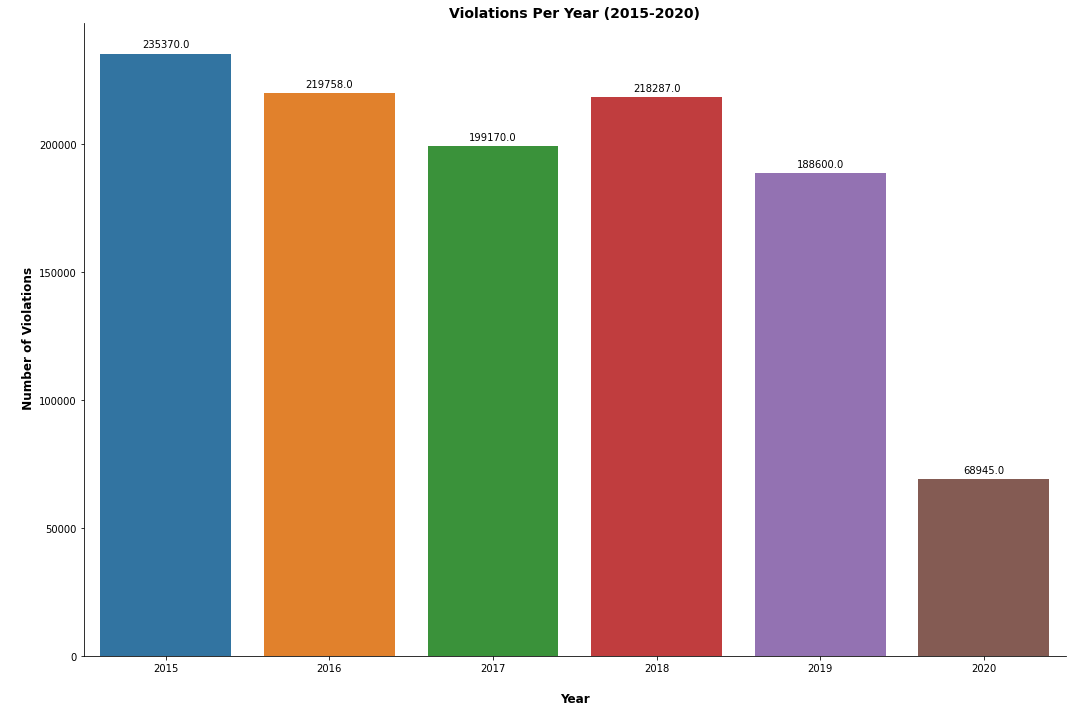

In [15]:
violationperyear = traffic_final.groupby(['year'])['Violation'].count()
# sns barplot
plt.figure(figsize=(15,10))
#colors = sns.color_palette("ch:s=.25,rot=-.25")
v_y = sns.barplot(violationperyear.index,violationperyear.values)
#sns.despine(top=True, right=True, left=True, bottom=True)
for p in v_y.patches:
    v_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Violations Per Year (2015-2020)",fontsize=14, fontweight="bold")
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.savefig('images/violationperyear.jpg')
plt.tight_layout()

Minor variations on a yearly basis is expected. A significant drop in the number of violation in 2020 can be attributed to decrease in traffic due to the pandemic.

### Number of Violations per Month (2015-2019)

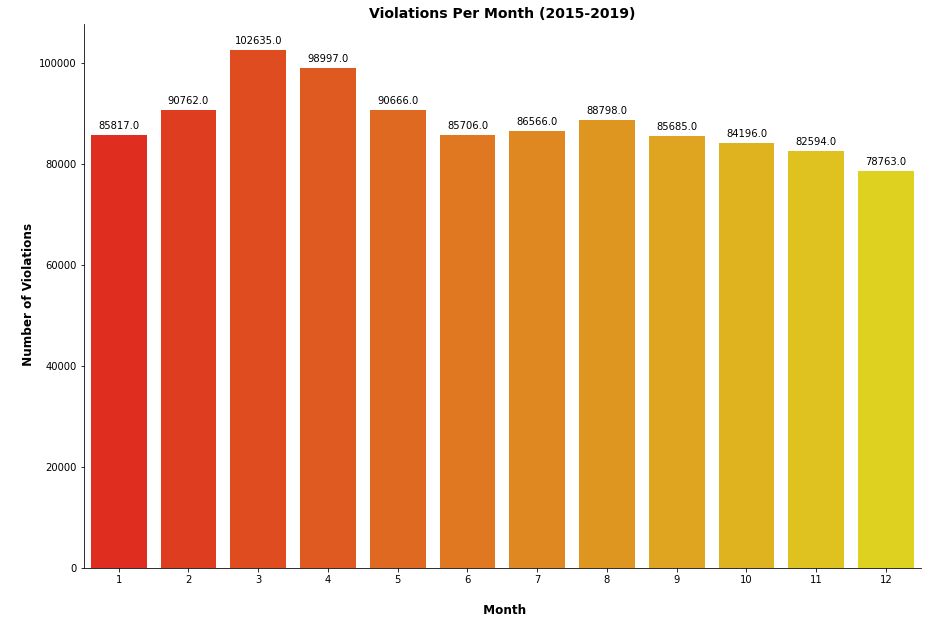

In [16]:
#violationpermonth = traffic_final.groupby(['month']).['Violation'].count()
violationpermonth_2019 = traffic_final_2019.groupby(['month'])['Violation'].count()
colors = sns.color_palette("plasma", n_colors=7)
plt.figure(figsize=(15,10))
m1=sns.barplot(violationpermonth_2019.index,violationpermonth_2019.values, palette= 'autumn')
sns.despine(top=True, right=True, left=True, bottom=True)
for p in m1.patches:
    m1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Violations Per Month (2015-2019)",fontsize=14,fontweight="bold")
plt.xlabel("\n Month", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.savefig('images/violationpermonth_2019.jpg')

### Number of Violations per Month for the year 2020

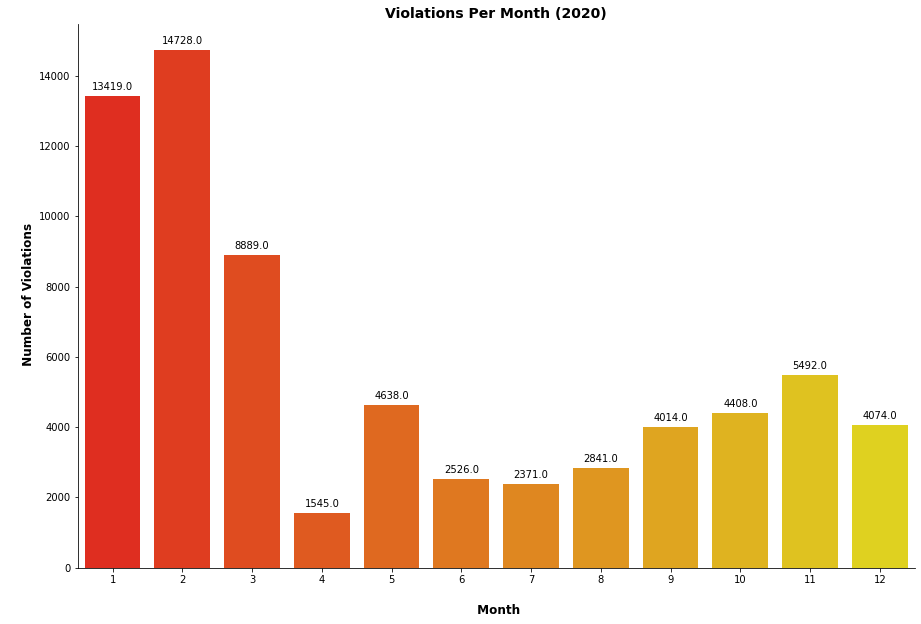

In [17]:
violationpermonth_2020 = traffic_final_2020.groupby(['month'])['Violation'].count()
plt.figure(figsize=(15,10))
m2 = sns.barplot(violationpermonth_2020.index,violationpermonth_2020.values,  palette= 'autumn')
for p in m2.patches:
    m2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Violations Per Month (2020)",fontsize=14,fontweight="bold")
plt.xlabel("\n Month", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('images/violationpermonth_2020.jpg')

### Number of Violations per Season (2015-2019)

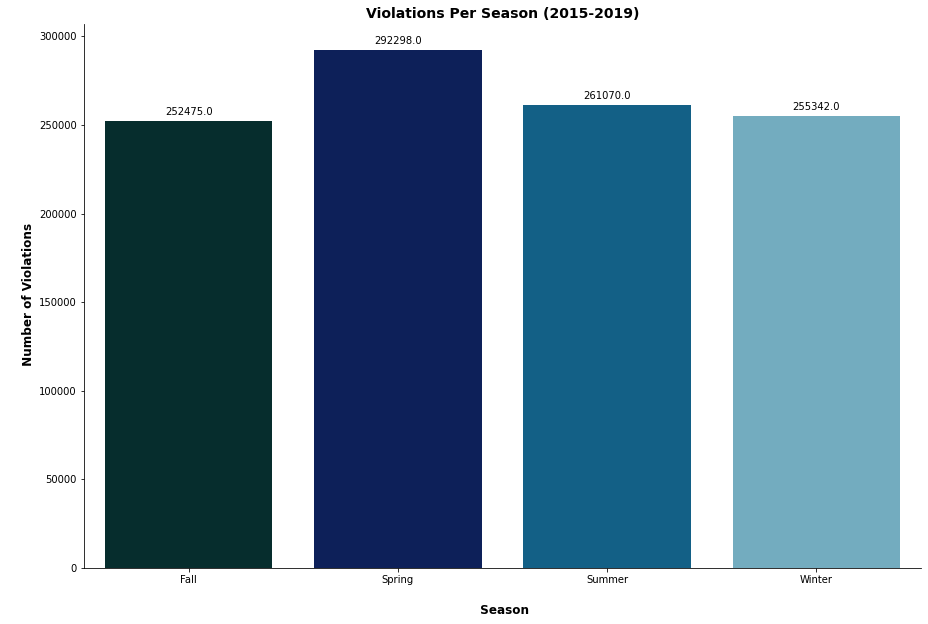

In [18]:
violationperseason_2019 = traffic_final_2019.groupby(['season'])['Violation'].count()
violationperseason_2020 = traffic_final_2020.groupby(['season'])['Violation'].count()
plt.figure(figsize=(15,10))
v_s = sns.barplot(violationperseason_2019.index,violationperseason_2019.values, palette='ocean')
sns.despine(top=True, right=True, left=True, bottom=True)
for p in v_s.patches:
    v_s.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Violations Per Season (2015-2019)",fontsize=14,fontweight="bold")
plt.xlabel("\n Season", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('images/violationperseason_2019.jpg')

### Number of Violations per Season for the year 2020

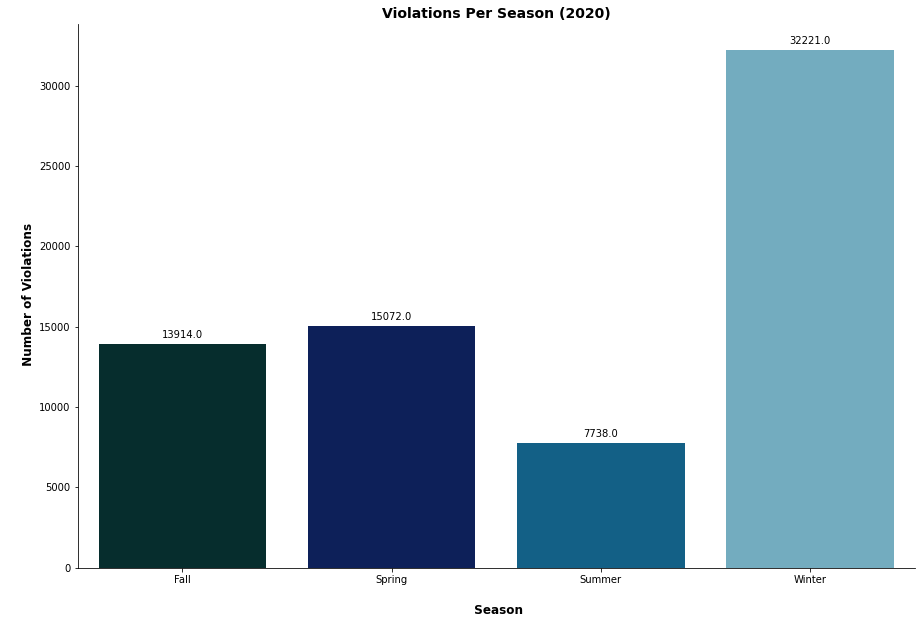

In [19]:
violationperseason_2020 = traffic_final_2020.groupby(['season'])['Violation'].count()
plt.figure(figsize=(15,10))
v_s2=sns.barplot(violationperseason_2020.index,violationperseason_2020.values, palette='ocean')
plt.title("Violations Per Season (2020)",fontsize=14,fontweight="bold")
plt.xlabel("\n Season", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
for p in v_s2.patches:
    v_s2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('images/violationperseason_2020.jpg')

When I looked into the variation of number of violations with month/season, noticed that Spring season had highest number from 2015-2019, where as in the winter it is high in the year 2020.

## Question 2 : What days of the week had the highest number of violations and how do they change over the years?

To answer this, heatmap visualization is used.

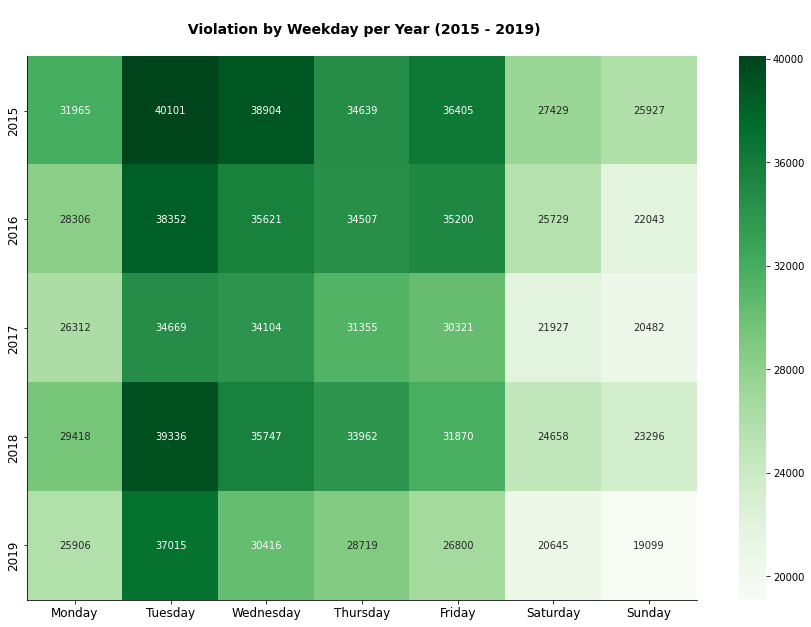

In [20]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
violationweekday_2019 = traffic_final_2019.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
violationweekday_2019 = violationweekday_2019.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(violationweekday_2019, annot=True, fmt="d",cmap="Greens")
plt.title('\n Violation by Weekday per Year (2015 - 2019)\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('images/violationsbyweekdayperyear_2019.jpg')
plt.show()

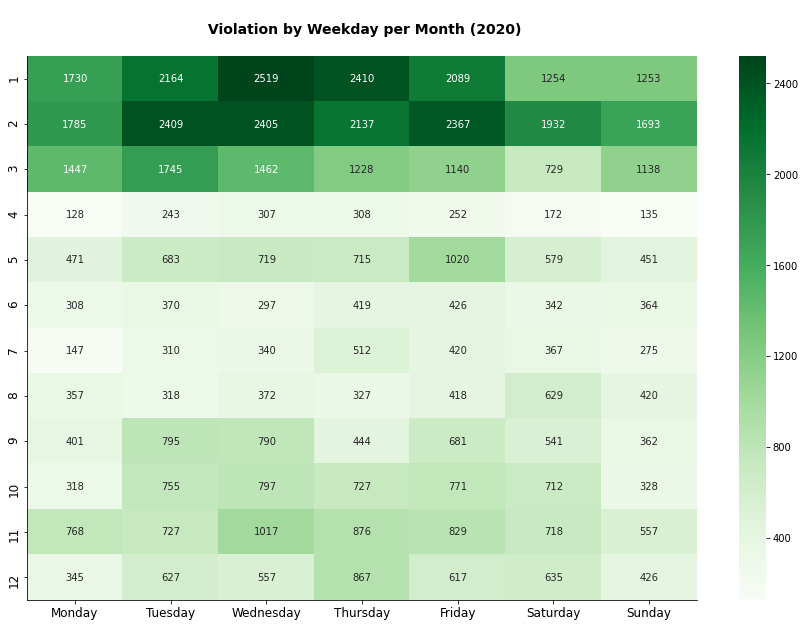

In [21]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
violationweekday = traffic_final_2019.groupby(['year', 'day']).size()
violationweekday_2020 = traffic_final_2020.groupby(['month', 'day']).size()
#Reshape using unstack() function in Pandas python: 
violationweekday = violationweekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
violationweekday_2020 = violationweekday_2020.rename_axis(['month', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(violationweekday_2020, annot=True, fmt="d",cmap="Greens")
sns.despine(top=True, right=True, left=False, bottom=False)

plt.title('\n Violation by Weekday per Month (2020)\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/violationsbyweekdayperyear_2020.jpg')
plt.show()

From 2015-2019, it is observed that Tuesday had highest number of violation. In 2020, we can see highest number in January-March. 

### Rush-hour Traffic

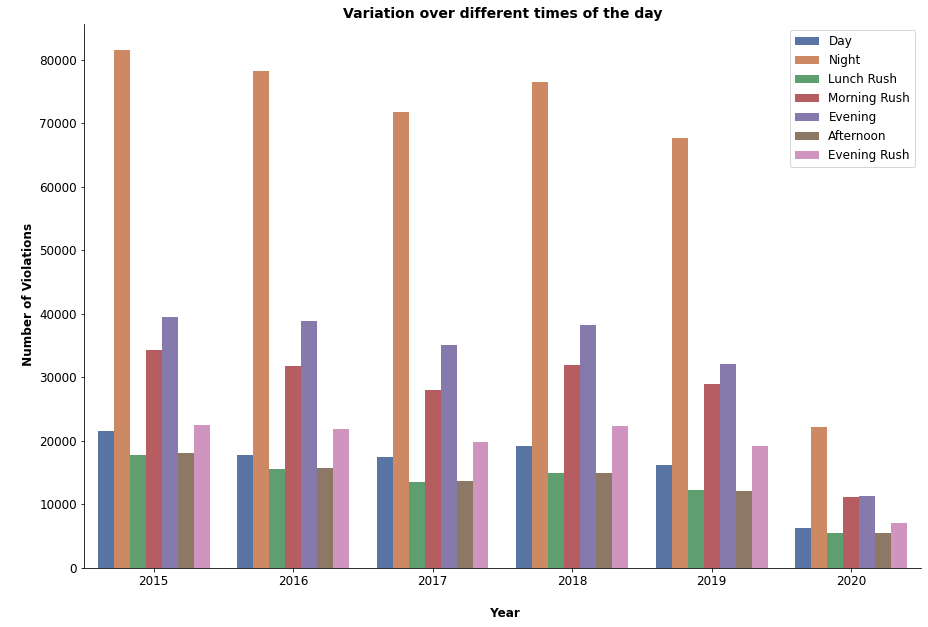

In [22]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"

plt.figure(figsize=(15,10))
rh=sns.countplot('year', hue ='Rush_time', 
              palette="deep", data=traffic_final)

#plt.style.use('classic')
plt.title("Variation over different times of the day",fontsize=14,fontweight="bold")
plt.xlabel("\n Year", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('images/viol_rushtime_year.jpg')

The maximum number of violation is during night and this trend is consistent from 2015-2020. It is important to know the factor causing for this.

## Statistics regarding Violations 

In [23]:
def compute_violation_stats(df2):
    """Compute statistics regarding Violations"""
    n_total = len(df2)
    n_alcohol = len(df2[df2['Alcohol'] == 1])
    n_belts = len(df2[df2['Belts']  == 0])
    n_Accident = len(df2[df2['Accident']  == 1]) 
    n_Personal_Injury = len(df2[df2['PersonalInjury']  == 1]) 
    n_Property_Damage = len(df2[df2['PropertyDamage']  == 1]) 
    n_Fatal = len(df2[df2['Fatal']  == 1]) 
    n_Work_Zone = len(df2[df2['WorkZone']  == 1]) 
    return(pd.Series(data = { 
        'n_total': n_total,
        'DUI': n_alcohol,
        'n_belts': n_belts,
        'n_Accident' :n_Accident,
        'n_Personal Injury' : n_Personal_Injury,
        'n_Property Damage' :  n_Property_Damage, 
        'n_Fatal' : n_Fatal,
        'n_WorkZone' : n_Work_Zone
        
    }))

In [24]:
compute_violation_stats(traffic_final_2019).astype(int)

n_total              1061185
DUI                      973
n_belts              1032376
n_Accident             26429
n_Personal Injury      12045
n_Property Damage      20738
n_Fatal                  242
n_WorkZone               257
dtype: int32

 When I looked into the total number of violations for traffic violation from 2015-2019, is for not wearing belts !
 Further, out of curiosity, the number of violations calculated only for night.
 
 **Note:** Here Belts =yes means driver was using belt in accident cases and that is the reason, in the coding above it has been take as 0.

In [25]:
is_night = traffic_final_2019['Rush_time']=='Night'
traffic_night_2019 = traffic_final_2019[is_night]
compute_violation_stats(traffic_night_2019 ).astype(int)

n_total              375901
DUI                     326
n_belts              371421
n_Accident             7613
n_Personal Injury      2614
n_Property Damage      6643
n_Fatal                  34
n_WorkZone               95
dtype: int32

Here also, maximum number is seen for Belts!

## Question 2 : Who (race and gender) got the highest number of tickets?

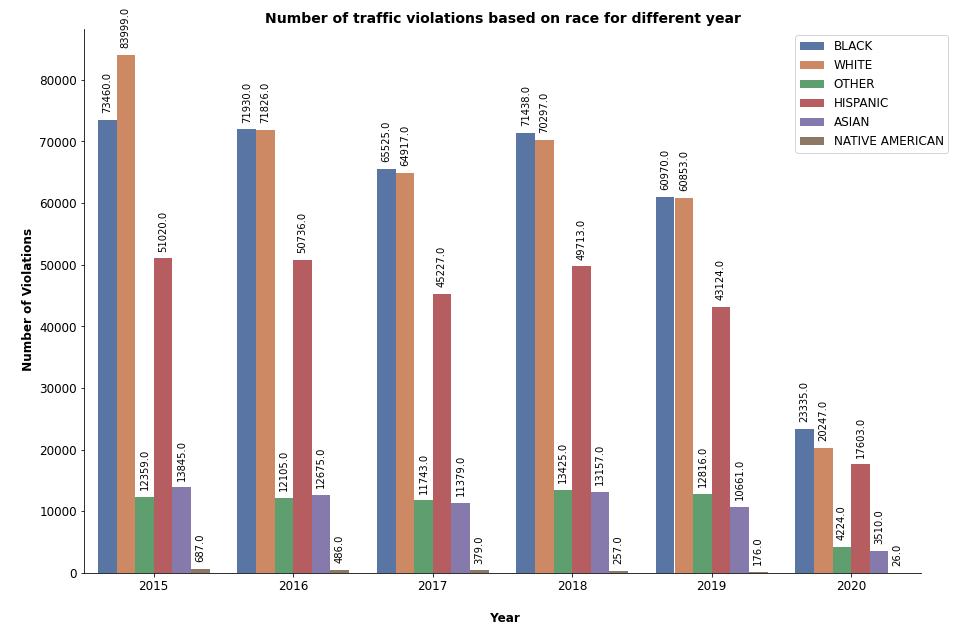

In [26]:
plt.figure(figsize=(15,10))
ax_g=sns.countplot('year', hue="Race",
              palette="deep", data=traffic_final)
plt.title("Number of traffic violations based on race for different year",fontsize=14,fontweight="bold")
plt.xlabel("\n Year", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
sns.despine(top=True, right=True, left=True, bottom=False)
for p in ax_g.patches:
    ax_g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   xytext = (0, 9), 
                   textcoords = 'offset points',rotation=90)
    sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('images/viol_race.jpg')

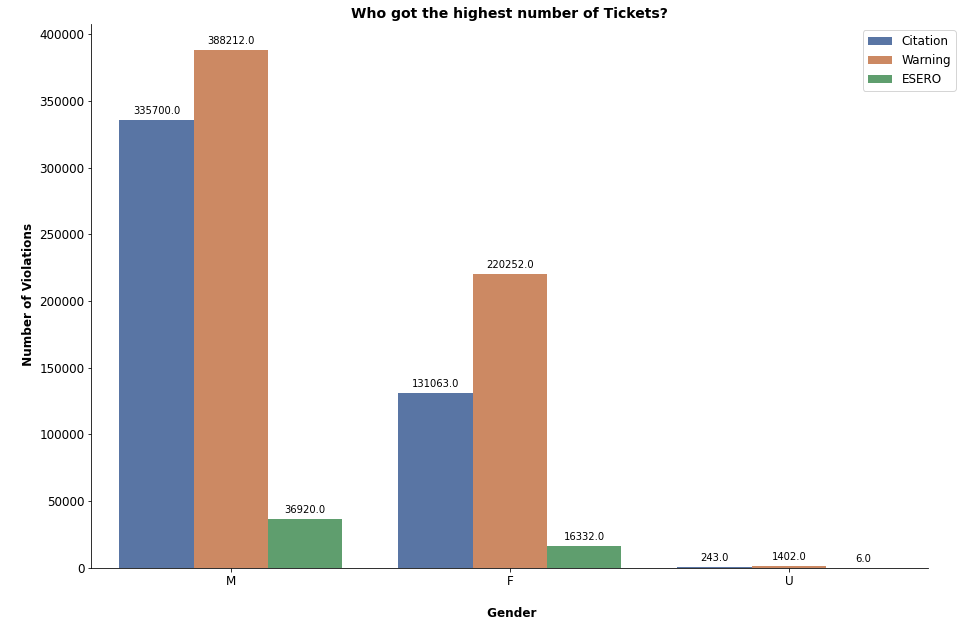

In [27]:
plt.figure(figsize=(15,10))
ax_r=sns.countplot('Gender', hue="ViolationType",
              palette="deep", data=traffic_final)
for p in ax_r.patches:
    ax_r.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Who got the highest number of Tickets?",fontsize=14,fontweight="bold")
plt.xlabel("\n Gender", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('images/viol_gender.jpg')

## Question 3 : Which color of the vehicle have the highest number of violations and did they contribute to accident?

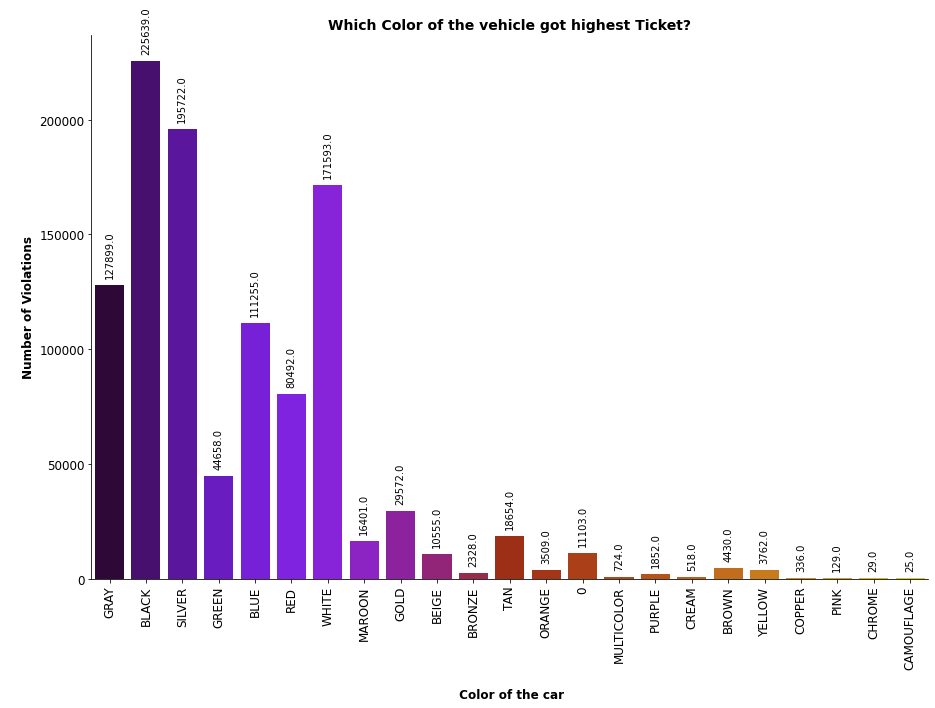

In [28]:
plt.figure(figsize=(15,10))
ax_c=sns.countplot('Color', 
              palette="gnuplot", data=traffic_final_2019)

plt.title("Which Color of the vehicle got highest Ticket?",fontsize=14,fontweight="bold")
plt.xlabel("\n Color of the car", fontsize=12, fontweight="bold")
#plt.legend().set_title('')
plt.ylabel("\nNumber of Violations", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in ax_c.patches:
    ax_c.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   xytext = (0, 9), rotation=90,
                   textcoords = 'offset points')
plt.savefig('images/viol_color.jpg')
plt.show()

The top 3 colors of the car involved in highest number of traffic violations is Black, Silver and White respectively.

Some [research](https://www.citywidelaw.com/los-angeles-car-accident-attorney/car-color-and-crash-risk/)
has revealed that black vehicles are the most dangerous on the road and concluded that visibility seems to be the driving factor. Black cars can be difficult to see, especially at night. Black cars also tend to blend into the surroundings, making it difficult for other drivers to see the dark vehicle.

## Question 4 : Which type of the vehicle have the highest number of violations?

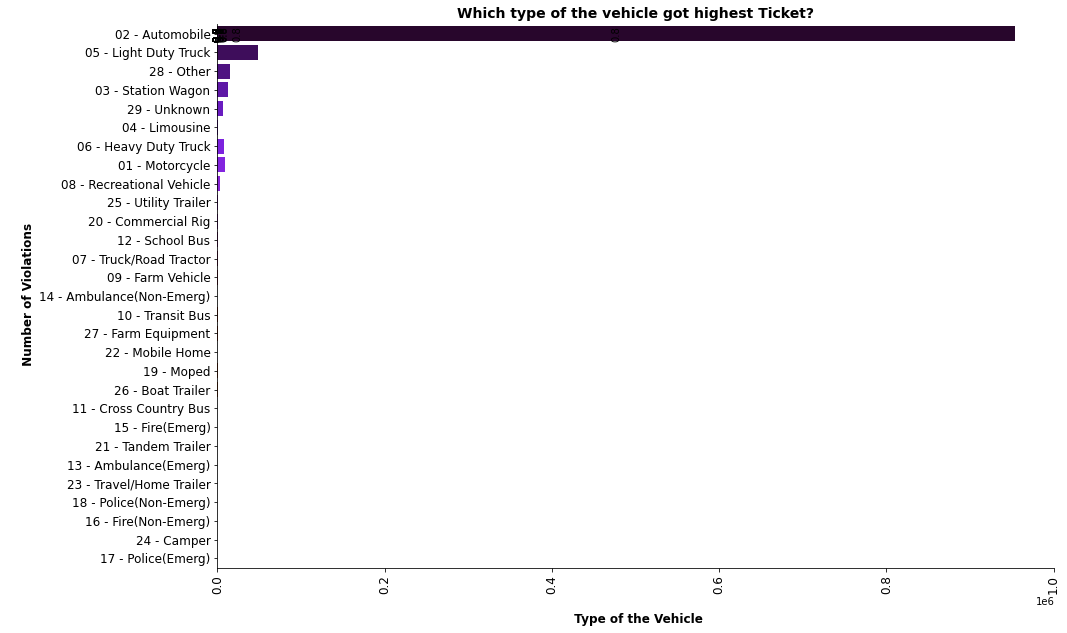

In [29]:
plt.figure(figsize=(15,10))
ax_t=sns.countplot(y='VehicleType', 
              palette="gnuplot", data=traffic_final_2019)

plt.title("Which type of the vehicle got highest Ticket?",fontsize=14,fontweight="bold")
plt.xlabel("\n Type of the Vehicle", fontsize=12, fontweight="bold")
#plt.legend().set_title('')
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in ax_t.patches:
    ax_t.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   xytext = (0, 9), rotation=90,
                   textcoords = 'offset points')
plt.savefig('images/viol_vehicletype.jpg')
plt.show()

In [30]:
%matplotlib inline
import cufflinks as cf
import plotly.offline as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()

#import plotly.graph_objs as go

cf.go_offline() # required to use plotly offline (no account required).
py.init_notebook_mode() # graphs charts inline (IPython).

traffic_final.date = pd.to_datetime(traffic_final.date)
traffic_final.date.sort_values().index
df_by_date = traffic_final.iloc[traffic_final.date.sort_values().index]
violations_by_date = df_by_date.groupby('date').date.count()

fig = violations_by_date.iplot(kind='scatter', title='Violations Per Day')
plt.savefig('images/viol_timeseries.jpg')
#Location_by_date.iplot(kind='bar', title='Violation Location per Day')
#fig.write_html("violations_by_date.html", auto_open=True)

<Figure size 432x288 with 0 Axes>

# Machine Learning Model -Traffic Violation<a class="anchor" id="sec2a"></a> 

# <font color='blue'> Binomial Classification </font>
*   ### <font color='green'>Can we predict drivers that are male with a Machine Learning model?
*   ### <font color='green'>Can we predict whether traffic violation contributed accident or not?
*   ### <font color='green'>Can we predict *Personal Injury* from the Traffic Violation Data ?

Here for each prediction different data frames with with corresponding target variable and features are defined. 

### Test and Train Data

For the performance of the model the data is split into the test data and train data. The data is split using the *train_test_split.* The data here is split in the ratio 70:30.

For the model prediction the logistic regression function is implemented by importing the logistic regression model in the sklearn module.

The model is then fit on the train set using the fit function. After this the prediction is performed using the prediction function.

Finally accuracy score is detemined and compared with the confusin matrix.

In [31]:
traffic_ML_2019 = traffic_final_2019.copy()
traffic_ML_2020 = traffic_final_2020.copy()

In [32]:
# Create a DataFrame of female drivers
female_2020 = traffic_ML_2020[traffic_final_2020.Gender == 'F']

# Create a DataFrame of male drivers
male_2020 = traffic_ML_2020[traffic_final_2020.Gender == 'M']

# Create a DataFrame of female drivers
female_2019 = traffic_ML_2019[traffic_final_2019.Gender == 'F']

# Create a DataFrame of male drivers
male_2019 = traffic_ML_2019[traffic_final_2019.Gender == 'M']

# Compute the violation types by female drivers (as proportions)
print("Violation Type for females in the year 2020:\n", female_2020.ViolationType.value_counts())

print('-------------------------------')

# Compute the violation types by male drivers (as proportions)
print("Violation Type for males in the year 2020:\n", male_2020.ViolationType.value_counts())
print('-------------------------------')

# Compute the violations by female drivers (as proportions)
print("Violation Type for females from 2015-2019:\n", female_2019.ViolationType.value_counts())

print('-------------------------------')

# Compute the violations by male drivers (as proportions)
print("Violation Type for males from 2015-2019:\n", male_2019.ViolationType.value_counts())

Violation Type for females in the year 2020:
 Warning     13350
Citation     7078
ESERO         598
Name: ViolationType, dtype: int64
-------------------------------
Violation Type for males in the year 2020:
 Warning     24376
Citation    21810
ESERO        1512
Name: ViolationType, dtype: int64
-------------------------------
Violation Type for females from 2015-2019:
 Warning     206902
Citation    123985
ESERO        15734
Name: ViolationType, dtype: int64
-------------------------------
Violation Type for males from 2015-2019:
 Warning     363836
Citation    313890
ESERO        35408
Name: ViolationType, dtype: int64


In [33]:
count_male_2019 = len(traffic_ML_2019[traffic_final_2019['Gender']=='M'])
count_female_2019 = len(traffic_ML_2019[traffic_final_2019['Gender']=='F'])
perc_of_male_2019 = count_male_2019/(count_male_2019+count_female_2019)
print("percentage of male from 2015-2019 :", perc_of_male_2019*100)
perc_of_female_2019 = count_female_2019/(count_male_2019+count_female_2019)
print("percentage of female from 2015-2019 :", perc_of_female_2019*100)
print("........................................................................")
count_male_2020 = len(traffic_final_2020[traffic_final_2020['Gender']=='M'])
count_female_2020 = len(traffic_final_2020[traffic_final_2020['Gender']=='F'])
perc_of_male_2020 = count_male_2020/(count_male_2020+count_female_2020)
print("percentage of male in the year 2020 :", perc_of_male_2020*100)
perc_of_female_2020 = count_female_2020/(count_male_2020+count_female_2020)
print("percentage of female in the year 2020 :", perc_of_female_2020*100)

percentage of male from 2015-2019 : 67.29234587239503
percentage of female from 2015-2019 : 32.70765412760496
........................................................................
percentage of male in the year 2020 : 69.40515685932135
percentage of female in the year 2020 : 30.594843140678655


We observe hear that classes are imbalanced. Ratio of male to female instances is 67:32 (from 2015-2019). It is interesting to note that percentage of male increased in the year 2020 and decreased for female.

In [34]:
traffic_ML_2019_Gender=traffic_ML_2019[['ViolationType', 'Race', 'Color', 'VehicleType','Gender']]
traffic_ML_2019_Gender['Gender'] = np.where(traffic_ML_2019_Gender['Gender'].str.contains('M'), 1, 0)

traffic_ML_2020_Gender=traffic_ML_2020[['ViolationType', 'Race', 'Color', 'VehicleType','Gender']]
traffic_ML_2020_Gender['Gender'] = np.where(traffic_ML_2020_Gender['Gender'].str.contains('M'), 1, 0)

In [35]:
traffic_ML_2019_Gender.head()

ViolationType   Race   Color      VehicleType  Gender
0      Citation  BLACK    GRAY  02 - Automobile       1
1       Warning  WHITE    GRAY  02 - Automobile       0
2       Warning  BLACK   BLACK  02 - Automobile       1
3       Warning  WHITE  SILVER  02 - Automobile       0
4       Warning  OTHER   BLACK  02 - Automobile       0

In [36]:
# Split the data into a training and test set.
features_gender_2019=pd.get_dummies(traffic_ML_2019_Gender.drop('Gender',axis=1))
target_gender_2019 =np.array(traffic_ML_2019_Gender['Gender'])
X_train_g2019, X_test_g2019, y_train_g2019, y_test_g2019 = train_test_split(features_gender_2019,target_gender_2019 
                                             ,test_size=0.30, random_state=99)

features_gender_2020=pd.get_dummies(traffic_ML_2020_Gender.drop('Gender' ,axis=1))
target_gender_2020 =np.array(traffic_ML_2020_Gender['Gender'])
X_train_g2020, X_test_g2020, y_train_g2020, y_test_g2020 = train_test_split(features_gender_2020,target_gender_2020 
                                             ,test_size=0.30, random_state=99)
################################################################################################################
#Fit the model using logistic regression
logmodel=LogisticRegression()
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
logmodel.fit(X_train_g2019, y_train_g2019)
y_pred_g2019 = logmodel.predict(X_test_g2019)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_g2019 = logmodel.predict_proba(X_test_g2019)[::,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score  from 2015-2019:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_g2019, y_pred_g2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model  from 2015-2019:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (logmodel.score(X_train_g2019, y_train_g2019) * 100))
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_g2019,y_pred_g2019))
################################################################################################################
logmodel.fit(X_train_g2020, y_train_g2020)
y_pred_g2020 = logmodel.predict(X_test_g2020)
print(colored("Accuracy score using meterics accuracy score for the year 2020:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_g2020, y_pred_g2020)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model for the year 2020:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (logmodel.score(X_train_g2020, y_train_g2020) * 100))
print('\n Classification Report for the year 2020 is :\n', classification_report(y_test_g2020,y_pred_g2020))

Accuracy score using meterics accuracy score  from 2015-2019:

Accuracy  67.23%
.............................................................

Accuracy score using logistic regression model  from 2015-2019:

Score of our model is 67.21%

 Classification Report is :
               precision    recall  f1-score   support

           0       0.53      0.01      0.01    104420
           1       0.67      1.00      0.80    213936

    accuracy                           0.67    318356
   macro avg       0.60      0.50      0.41    318356
weighted avg       0.63      0.67      0.54    318356

Accuracy score using meterics accuracy score for the year 2020:

Accuracy  69.30%
.............................................................

Accuracy score using logistic regression model for the year 2020:

Score of our model is 69.10%

 Classification Report for the year 2020 is :
               precision    recall  f1-score   support

           0       0.48      0.02      0.03      6342
        

The classification report displays the **Precision, Recall , F1  and Support** scores for the model. 

**Precision**: determines the accuracy of positive predictions which is 69 %.

**Recall:** determines the fraction of positives that were correctly identified which is 100%.

**F1 Score:** is a weighted harmonic mean of precision and recall with the best score of 1 and the worst score of 0. F1 score conveys the balance between the precision and the recall. **F1 score for male is 0.82 and for female is 0.02.**

The classification report revealed that the micro average of F1 score is about 0.42, which indicates that the trained model has a classification strength of 42%.

### Classification Accuracy

In [37]:
print(colored("Accuracy:",'green', attrs=['bold']),metrics.accuracy_score(y_test_g2019, y_pred_g2019))
print(colored("Precision:",'blue', attrs=['bold']),metrics.precision_score(y_test_g2019, y_pred_g2019))
print(colored("Recall:",'red', attrs=['bold']),metrics.recall_score(y_test_g2019, y_pred_g2019))
print(colored("F1 Score: {}",'red', attrs=['bold']).format(f1_score(y_test_g2019, y_pred_g2019)))

Accuracy: 0.6722631268140069
Precision: 0.6728750839934509
Recall: 0.9969991025353376
F1 Score: 0.8034807176154823


### Confusion matrix and ROC Curve

Confusion matrix is a table which describes the performance of a prediction model. A confusion matrix contains the actual values and predicted values. we can use these values to calculate the accuracy score of the model.

Confusion matrix

 [[   725 103695]
 [   642 213294]]

True Positives(TP) =  725

True Negatives(TN) =  213294

False Positives(FP) =  103695

False Negatives(FN) =  642


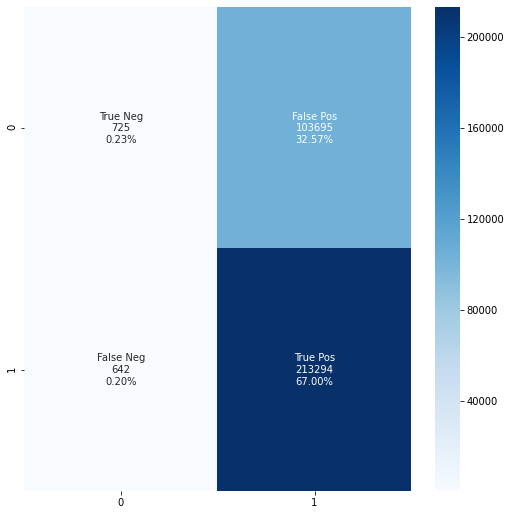

In [38]:
cnf_matrix_g_2019 = metrics.confusion_matrix(y_test_g2019,y_pred_g2019)
#cnf_matrix_g_2019
print('Confusion matrix\n\n', cnf_matrix_g_2019)

print('\nTrue Positives(TP) = ', cnf_matrix_g_2019[0,0])

print('\nTrue Negatives(TN) = ', cnf_matrix_g_2019[1,1])

print('\nFalse Positives(FP) = ', cnf_matrix_g_2019[0,1])

print('\nFalse Negatives(FN) = ', cnf_matrix_g_2019[1,0])
#################################################################################################################
fig, ax = plt.subplots(figsize=(8,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_g_2019.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_g_2019.flatten()/np.sum(cnf_matrix_g_2019)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_g_2019, annot=labels, fmt='', cmap='Blues')
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)

The confusion matrix shows 786 + 213380 = 2,14,166 correct predictions and 103468 + 722 = 104,190 incorrect predictions.

**TP / True Positive:** when an actual observation was positive and the model prediction is also positive.

**TN / True Negative:** when an actual observation was negative and the model prediction is also negative.

**FP / False Positive:** when an actual observation was negative but the model prediction is positive.

**FN / False Negative:** when an actual observation was positive but the model prediction is negative.

### ROC Curve


 Confusion Matrix and ROC Curve:



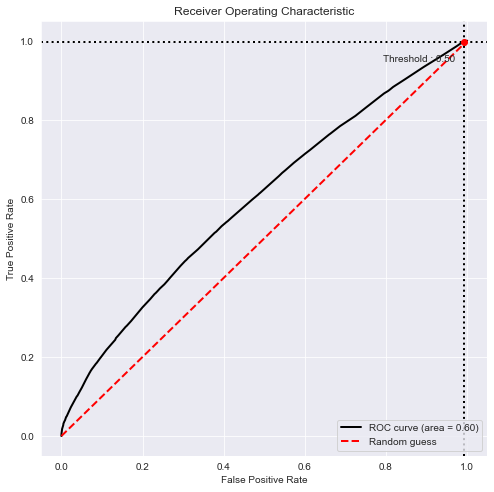

In [39]:
#################################################################################################################
# Visualisation with plot_metric
print(colored('\n Confusion Matrix and ROC Curve:\n', 'green', attrs=['bold']))
bc_g_2019 = BinaryClassification(y_test_g2019, y_pred_prob_g2019, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc_g_2019.plot_roc_curve()
plt.show()

AUC score for the case is 0.60. AUC score 1 represents perfect classifier, and 0.6 is not very good classifier. 

###### When AUC is approximately 0.5, model has no discrimination capacity to distinguish between positive class and negative class. 

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

### Comparison with other Classifier

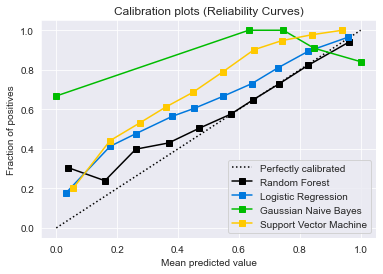

In [40]:
#Comparison with other Classifier
rf = RandomForestClassifier()
lr = LogisticRegression()
nb = GaussianNB()
svm = LinearSVC()
rf_probas = rf.fit(X_train_g2019, y_train_g2019).predict_proba(X_test_g2019)
lr_probas = lr.fit(X_train_g2019, y_train_g2019).predict_proba(X_test_g2019)
nb_probas = nb.fit(X_train_g2019, y_train_g2019).predict_proba(X_test_g2019)
svm_scores = svm.fit(X_train_g2019, y_train_g2019).decision_function(X_test_g2019)
probas_list = [rf_probas, lr_probas, nb_probas, svm_scores]
clf_names = ['Random Forest', 'Logistic Regression',
             'Gaussian Naive Bayes', 'Support Vector Machine']
skplt.metrics.plot_calibration_curve(y_test_g2019,
                                      probas_list,
                                      clf_names)
plt.show()

###  <font color='green'> Can we predict whether traffic violation contributed accident or not? </font>

In [41]:
traffic_ML_2019_CL =traffic_ML_2019.copy()
traffic_ML_2019_CL.ContributedToAccident[traffic_ML_2019_CL.ContributedToAccident == 'True'] = 1
traffic_ML_2019_CL.ContributedToAccident[traffic_ML_2019_CL.ContributedToAccident == 'False'] = 0 
traffic_ML_2019_CL.ContributedToAccident =  traffic_ML_2019_CL.ContributedToAccident.astype("float").astype("int")

features_ca_2019=traffic_ML_2019_CL.drop(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation','Rush_time'],axis=1)
target_ca_2019 =np.array(traffic_ML_2019_CL['ContributedToAccident'])

X_train_ca2019, X_test_ca2019, y_train_ca2019, y_test_ca2019 = train_test_split(features_ca_2019,target_ca_2019 
                                             ,test_size=0.30, random_state=99)
################################################################################################################
#Fit the model using logistic regression
logmodel=LogisticRegression()
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
logmodel.fit(X_train_ca2019, y_train_ca2019)
y_pred_ca2019 = logmodel.predict(X_test_ca2019)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_ca2019 = logmodel.predict_proba(X_test_ca2019)[:,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_ca2019, y_pred_ca2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (logmodel.score(X_train_ca2019, y_train_ca2019) * 100))
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_ca2019,y_pred_ca2019))

Accuracy score using meterics accuracy score:

Accuracy  100.00%
.............................................................

Accuracy score using logistic regression model:

Score of our model is 100.00%

 Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    310621
           1       1.00      1.00      1.00      7735

    accuracy                           1.00    318356
   macro avg       1.00      1.00      1.00    318356
weighted avg       1.00      1.00      1.00    318356



Here **Precision** and **Recall:** is 100%. Further F1 score for Contributed to Accident and not Contributed to ascciden

The classification report revealed that the micro average of F1 score is 1, which indicates that the trained model has a classification strength of 100%.

### Classification Accuracy

In [42]:
print(colored("Accuracy:",'green', attrs=['bold']),metrics.accuracy_score(y_test_ca2019, y_pred_ca2019))
print(colored("Precision:",'blue', attrs=['bold']),metrics.precision_score(y_test_ca2019, y_pred_ca2019))
print(colored("Recall:",'red', attrs=['bold']),metrics.recall_score(y_test_ca2019, y_pred_ca2019))
print(colored("F1 Score: {}",'red', attrs=['bold']).format(f1_score(y_test_ca2019, y_pred_ca2019)))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


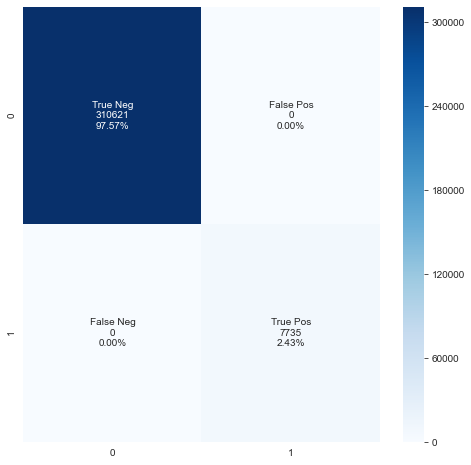

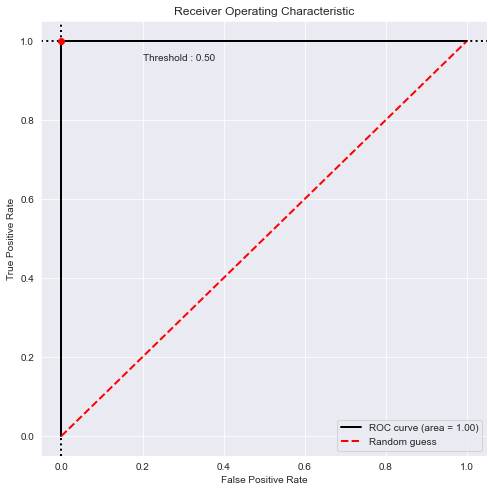

In [43]:
### Confusion matrix and ROC Curve

cnf_matrix_ca_2019 = metrics.confusion_matrix(y_test_ca2019,y_pred_ca2019)
#cnf_matrix_ca_2019

fig, ax = plt.subplots(figsize=(8,8)) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_ca_2019.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_ca_2019.flatten()/np.sum(cnf_matrix_ca_2019)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_ca_2019, annot=labels, fmt='', cmap='Blues')
#################################################################################################################
# Visualisation with plot_metric
bc_ca_2019 = BinaryClassification(y_test_ca2019, y_pred_prob_ca2019 , labels=["0", "1"])
# Figures
plt.figure(figsize=(8,8))
bc_ca_2019.plot_roc_curve()
plt.show()


<font color='maroon'> **AUC score 1 represents perfect classifier !!! </font>**

###  <font color='green'> Can we predict Personal Injury caused by Traffic Violation? </font>

In [44]:
# Split the data into a training and test set.
features_pi_2019=traffic_ML_2019.drop(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation','PersonalInjury','Rush_time'],axis=1)
target_pi_2019 =np.array(traffic_ML_2019['PersonalInjury'])
X_train_pi2019, X_test_pi2019, y_train_pi2019, y_test_pi2019 = train_test_split(features_pi_2019,target_pi_2019 
                                             ,test_size=0.20, random_state=99)
################################################################################################################
#Fit the model using logistic regression
logmodel=LogisticRegression()
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
logmodel.fit(X_train_pi2019, y_train_pi2019)
y_pred_pi2019 = logmodel.predict(X_test_pi2019)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_pi2019 = logmodel.predict_proba(X_test_pi2019)[:,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_pi2019, y_pred_pi2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (logmodel.score(X_train_pi2019, y_train_pi2019) * 100))
print(".............................................................\n")
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_ca2019,y_pred_ca2019))

Accuracy score using meterics accuracy score:

Accuracy  98.95%
.............................................................

Accuracy score using logistic regression model:

Score of our model is 98.96%
.............................................................


 Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    310621
           1       1.00      1.00      1.00      7735

    accuracy                           1.00    318356
   macro avg       1.00      1.00      1.00    318356
weighted avg       1.00      1.00      1.00    318356



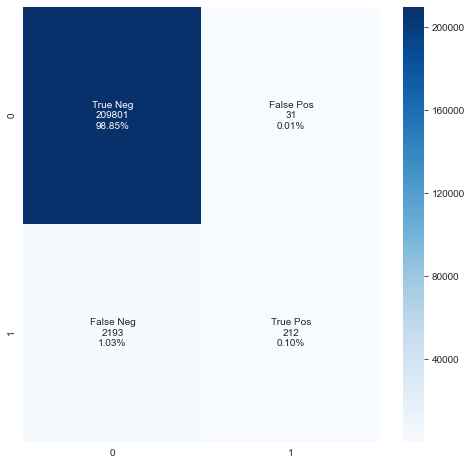

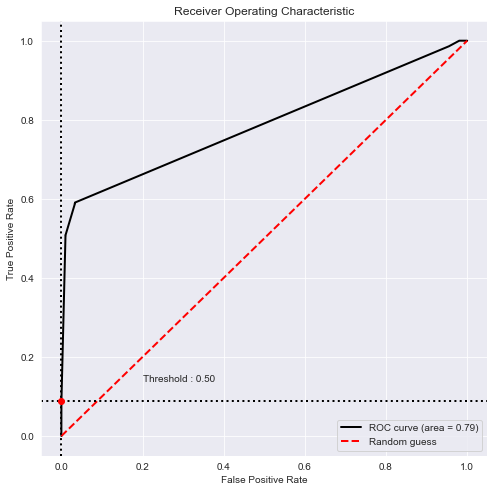

In [45]:
#Confusion Matrix
cnf_matrix_pi_2019 = metrics.confusion_matrix(y_test_pi2019,y_pred_pi2019)
#cnf_matrix_pi_2019
fig, ax = plt.subplots(figsize=(8,8)) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_pi_2019.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_pi_2019.flatten()/np.sum(cnf_matrix_pi_2019)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_pi_2019, annot=labels, fmt='', cmap='Blues')
#plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
#################################################################################################################

# Visualisation with plot_metric
bc_pi_2019  = BinaryClassification(y_test_pi2019, y_pred_prob_pi2019, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc_pi_2019.plot_roc_curve()
plt.show()

Here AUC score for the case is 0.80 and which is good classifier. Since ROC AUC of our model approaches towards 1, our classifier does a good job in predicting Personal Injury.

# <font color='blue'> Multinomial Classification </font>
*   ### <font color='green'>Can we predict Violation Type?
*   ### <font color='green'>Can we predict Vehicle Type?

### Can we predict Violation Type?

In [46]:
# Split the data into a training and test set.
features_vt_2019=traffic_ML_2019.drop(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation','Rush_time'],axis=1)
target_vt_2019 =np.array(traffic_ML_2019['ViolationType'])
X_train_vt2019, X_test_vt2019, y_train_vt2019, y_test_vt2019 = train_test_split(features_vt_2019,target_vt_2019 
                                             ,test_size=0.30, random_state=99)
################################################################################################################
#Fit the model using logistic regression
mult_logmodel = LogisticRegression(solver='lbfgs',multi_class='auto')
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
mult_logmodel.fit(X_train_vt2019, y_train_vt2019)
y_pred_vt2019 = mult_logmodel.predict(X_test_vt2019)
y_pred_prob_vt2019 = mult_logmodel.predict_proba(X_test_vt2019)[:,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_vt2019, y_pred_vt2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (mult_logmodel.score(X_train_vt2019, y_train_vt2019) * 100))
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_vt2019,y_pred_vt2019))

Accuracy score using meterics accuracy score:

Accuracy  57.62%
.............................................................

Accuracy score using logistic regression model:

Score of our model is 57.57%

 Classification Report is :
               precision    recall  f1-score   support

    Citation       0.78      0.12      0.21    131206
       ESERO       0.00      0.00      0.00     15509
     Warning       0.56      0.98      0.71    171641

    accuracy                           0.58    318356
   macro avg       0.45      0.37      0.31    318356
weighted avg       0.62      0.58      0.47    318356



### Classification Accuracy

In [47]:
print(colored("Accuracy:",'green', attrs=['bold']),metrics.accuracy_score(y_test_vt2019, y_pred_vt2019))
print(colored("Precision:",'blue', attrs=['bold']),metrics.precision_score(y_test_vt2019, y_pred_vt2019, average='weighted'))
print(colored("Recall:",'red', attrs=['bold']),metrics.recall_score(y_test_vt2019, y_pred_vt2019, average='weighted'))
print(colored("F1 Score: {}",'red', attrs=['bold']).format(f1_score(y_test_vt2019, y_pred_vt2019, average='weighted')))

Accuracy: 0.5761757278015807
Precision: 0.6236281387083497
Recall: 0.5761757278015807
F1 Score: 0.47123566677961826


Since we have multiclass, we need to calculate average precision, recall and F1 scores.

### Confusion Matrix for Multiclass

In [48]:
#Confusion Matrix
cnf_matrix_vt_2019 = metrics.confusion_matrix(y_test_vt2019,y_pred_vt2019)
cnf_matrix_vt_2019

array([[ 15927,      0, 115279],
       [   418,      0,  15091],
       [  4139,      0, 167502]], dtype=int64)

In [49]:
multilabel_confusion_matrix(y_test_vt2019,y_pred_vt2019, labels=["Citation", "ESERO", "Warning"])

array([[[182593,   4557],
        [115279,  15927]],

       [[302847,      0],
        [ 15509,      0]],

       [[ 16345, 130370],
        [  4139, 167502]]], dtype=int64)

The *multilabel_confusion_matrix* calculates class-wise or sample-wise multilabel confusion matrices, and in multiclass tasks, labels are binarized under a one-vs-rest way; while confusion_matrix calculates one confusion matrix for confusion between every two classes.

## Confusion Matrix heat map with and without Normalization for multiclass 

Confusion matrix, without normalization
[[ 15927      0 115279]
 [   418      0  15091]
 [  4139      0 167502]]
Normalized confusion matrix
[[0.12 0.   0.88]
 [0.03 0.   0.97]
 [0.02 0.   0.98]]


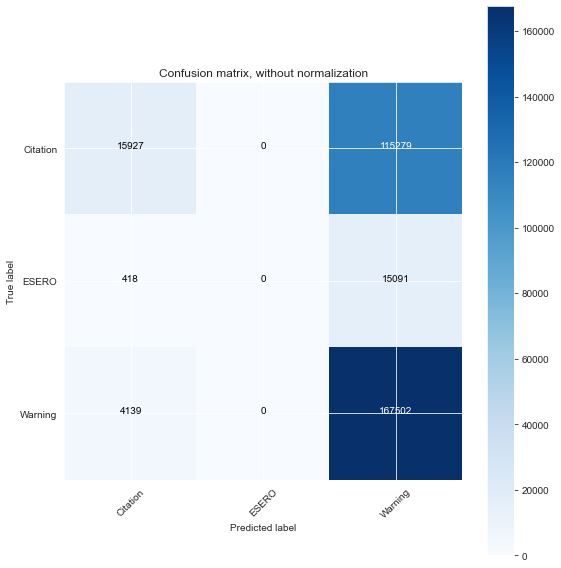

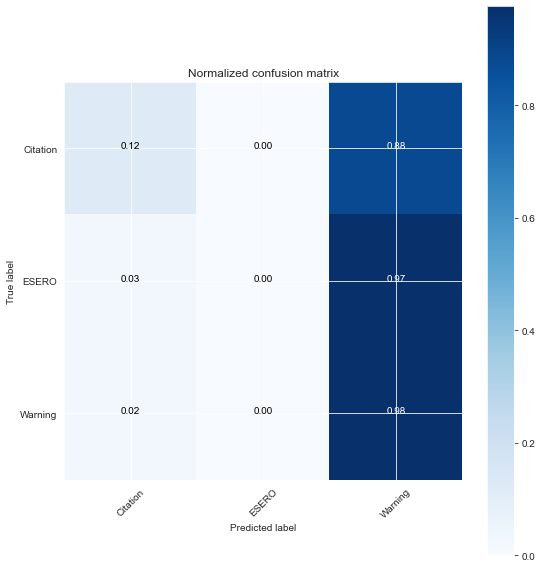

In [50]:
class_names = ['Citation', 'ESERO','Warning' ]
import itertools   
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_vt2019, y_pred_vt2019)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix_vt_2019, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix_vt_2019, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## <font color='green'> Can we predict Vehicle Type? </font>

In [51]:
# Split the data into a training and test set.
features_V_2019=traffic_ML_2019.drop(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation','VehicleType','Rush_time'],axis=1)
target_V_2019 =np.array(traffic_ML_2019['VehicleType'])
X_train_V2019, X_test_V2019, y_train_V2019, y_test_V2019 = train_test_split(features_V_2019,target_V_2019 
                                             ,test_size=0.30, random_state=99)
################################################################################################################
#Fit the model using logistic regression
mult_logmodel = LogisticRegression(solver='lbfgs',multi_class='auto')
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
mult_logmodel.fit(X_train_V2019, y_train_V2019)
y_pred_V2019 = mult_logmodel.predict(X_test_V2019)
y_pred_prob_V2019 = mult_logmodel.predict_proba(X_test_V2019)[:,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_V2019, y_pred_V2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (mult_logmodel.score(X_train_V2019, y_train_V2019) * 100))
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_V2019,y_pred_V2019))

Accuracy score using meterics accuracy score:

Accuracy  89.84%
.............................................................

Accuracy score using logistic regression model:

Score of our model is 89.85%

 Classification Report is :
                            precision    recall  f1-score   support

          01 - Motorcycle       0.00      0.00      0.00      2679
          02 - Automobile       0.90      1.00      0.95    285999
       03 - Station Wagon       0.00      0.00      0.00      3934
           04 - Limousine       0.00      0.00      0.00       135
    05 - Light Duty Truck       0.00      0.00      0.00     14662
    06 - Heavy Duty Truck       0.00      0.00      0.00      2214
  07 - Truck/Road Tractor       0.00      0.00      0.00       282
08 - Recreational Vehicle       0.00      0.00      0.00       761
        09 - Farm Vehicle       0.00      0.00      0.00        18
         10 - Transit Bus       0.00      0.00      0.00        87
   11 - Cross Country Bus  

### Classification Accuracy

In [52]:
print(colored("Accuracy:",'green', attrs=['bold']),metrics.accuracy_score(y_test_V2019, y_pred_V2019))
print(colored("Precision:",'blue', attrs=['bold']),metrics.precision_score(y_test_V2019, y_pred_V2019, average='weighted'))
print(colored("Recall:",'red', attrs=['bold']),metrics.recall_score(y_test_V2019, y_pred_V2019, average='weighted'))
print(colored("F1 Score: {}",'red', attrs=['bold']).format(f1_score(y_test_V2019, y_pred_V2019, average='weighted')))

Accuracy: 0.8983622108582844
Precision: 0.8070546618981846
Recall: 0.8983622108582844
F1 Score: 0.8502641458853109


In [53]:
### Confusion Matrix for Multiclass

In [54]:
#Confusion Matrix
#cnf_matrix_V_2019 = metrics.confusion_matrix(y_test_V2019,y_pred_V2019)
#cnf_matrix_V_2019
mult_conf_mat_V2019 =multilabel_confusion_matrix(y_test_V2019,y_pred_V2019)
mult_conf_mat_V2019

array([[[315677,      0],
        [  2679,      0]],

       [[     0,  32357],
        [     0, 285999]],

       [[314422,      0],
        [  3934,      0]],

       [[318221,      0],
        [   135,      0]],

       [[303694,      0],
        [ 14662,      0]],

       [[316142,      0],
        [  2214,      0]],

       [[318074,      0],
        [   282,      0]],

       [[317595,      0],
        [   761,      0]],

       [[318338,      0],
        [    18,      0]],

       [[318269,      0],
        [    87,      0]],

       [[318349,      0],
        [     7,      0]],

       [[318296,      0],
        [    60,      0]],

       [[318353,      0],
        [     3,      0]],

       [[318353,      0],
        [     3,      0]],

       [[318350,      0],
        [     6,      0]],

       [[318354,      0],
        [     2,      0]],

       [[318130,      0],
        [   226,      0]],

       [[318207,      0],
        [   149,      0]],

       [[318336,      0],
  

**Conclusion :** Classification accuracy can hide the details about the model. One of the issue is when data does not have even number of classes. Model may achieve 90% accuracy, but this is not a good score as if 90 samples out of 100 belongs to one class and this accuracy can be achieved easily by always predicting most common class.

# Crash Incident Data
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fk-dce5

# 2a. Crash Reporting – Motorists Data <a class="anchor" id="sec3"></a> 


In [55]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRI = 'https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD'
    CRI = pd.read_csv(url_CRI,low_memory=False)

In [56]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRI):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRI['Crash Date/Time'] = pd.to_datetime(CRI['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRI['date'] = pd.to_datetime(CRI['Crash Date/Time'])
    CRI['year'] = CRI['Crash Date/Time'].dt.year
    CRI['month'] = CRI['Crash Date/Time'].dt.month
    CRI['time'] = CRI['Crash Date/Time'].dt.time
    CRI['hour'] = CRI['Crash Date/Time'].dt.hour
    #CRI['day'] = CRI['Crash Date/Time'].dt.weekday_name
    CRI['day'] = CRI['Crash Date/Time'].dt.day_name()
    
    CRI = CRI.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRI = CRI[CRI.date >='01/01/2015']
    CRI = CRI[CRI.date <'12/16/2020']
    CRI = CRI.reset_index(drop=True)
    
    CRI['season']= "Fall"
    CRI.loc[(CRI['month'] < 3) | (CRI['month'] >= 12), "season"] = 'Winter'
    CRI.loc[(CRI['month'] < 6) & (CRI['month'] >= 3), "season"] = 'Spring'
    CRI.loc[(CRI['month'] < 9) & (CRI['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRI['crash'] = pd.Series(1, index=CRI.index)
    
    return CRI

In [57]:
# All the above features are stored in new data frame "CRI_features"
CRI_features = useFeatures(CRI)

In [58]:
## Replace white space everywhere
CRI_features.columns =CRI_features.columns.str.replace(' ', '')

In [59]:
 # Replace all NaN's by 0
#CRI_new = CRI_features.fillna(0)

#Renaming the column and replacing 
CRI_new =  CRI_features.rename(columns={"AgencyName": "Agency"})
CRI_new = CRI_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRI_new.head()

ReportNumber LocalCaseNumber Agency         ACRSReportType  \
0  MCP11520005        15000008    MCP  Property Damage Crash   
1  MCP2686000D        15000017    MCP  Property Damage Crash   
2  MCP2783000G        15000025    MCP           Injury Crash   
3  MCP2674000D        15000016    MCP  Property Damage Crash   
4  MCP23000002        15000197    MCP  Property Damage Crash   

       CrashDate/Time Hit/Run         RouteType  MilePoint MilePointDirection  \
0 2015-01-01 00:30:00     Yes  Maryland (State)       4.38              North   
1 2015-01-01 01:10:00      No              Ramp       0.15              South   
2 2015-01-01 01:14:00      No  Maryland (State)      25.21               East   
3 2015-01-01 01:26:00      No            County       0.76              North   
4 2015-01-01 02:00:00      No            County       1.81              North   

  LaneDirection  ...  Longitude                     Location  \
0         North  ... -77.102673  (39.02200107, -77.10267305)   
1         South  ... -77.265547     (39.19661, -77.26554667)   
2          East  ... -77.109803  (39.09621667, -77.10980333)   
3          West  ... -77.204349      (39.158059, -77.204349)   
4         North  ... -77.093848      (39.148678, -77.093848)   

                 date  year  month      time hour       day  season crash  
0 2015-01-01 00:30:00  2015      1  00:30:00    0  Thursday  Winter     1  
1 2015-01-01 01:10:00  2015      1  01:10:00    1  Thursday  Winter     1  
2 2015-01-01 01:14:00  2015      1  01:14:00    1  Thursday  Winter     1  
3 2015-01-01 01:26:00  2015      1  01:26:00    1  Thursday  Winter     1  
4 2015-01-01 02:00:00  2015      1  02:00:00    2  Thursday  Winter     1  

[5 rows x 52 columns]

In [60]:
CRI_new['Rush_time']=CRI_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRI(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [61]:
#apply function   
CRI_new['Rush_time']= CRI_new['Rush_time'].apply(rushhour_CRI)

In [62]:
#CRI_final = CRI_new.fillna(method='ffill')
CRI_final = CRI_new.fillna(0)

**Here onwards, I splitted entire data frame into two new data frames. One data is from 2015-2019 and another for the year 2020.** 

In [63]:
CRI_is_2020 =CRI_final['year']==2020
CRI_is_2019 = CRI_final['year'] != 2020
#Creating Dataframe only for the year 2020
CRI_final_2020 = CRI_final[CRI_is_2020]
#Data from 2015- 2019
CRI_final_2019 = CRI_final[CRI_is_2019]
print("Size of the original data frame:",CRI_final.shape)
print("Size of the original data frame from 2015-2019:", CRI_final_2019.shape)
print("Size of the original data frame for the year 2020:", CRI_final_2020.shape)

Size of the original data frame: (66648, 53)
Size of the original data frame from 2015-2019: (59200, 53)
Size of the original data frame for the year 2020: (7448, 53)


# 3. Crash Reporting – Non - Motorists Data<a class="anchor" id="sec4"></a> 

In [64]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRNM = 'https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD'
    CRNM= pd.read_csv(url_CRNM,low_memory=False)

In [65]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRNM):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRNM['Crash Date/Time'] = pd.to_datetime(CRNM['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRNM['date'] = pd.to_datetime(CRNM['Crash Date/Time'])
    CRNM['year'] = CRNM['Crash Date/Time'].dt.year
    CRNM['month'] = CRNM['Crash Date/Time'].dt.month
    CRNM['time'] = CRNM['Crash Date/Time'].dt.time
    CRNM['hour'] = CRNM['Crash Date/Time'].dt.hour
    #CRNM['day'] = CRNM['Crash Date/Time'].dt.weekday_name
    CRNM['day'] = CRNM['Crash Date/Time'].dt.day_name()
    
    CRNM = CRNM.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRNM = CRNM[CRNM.date >='01/01/2015']
    CRNM = CRNM[CRNM.date <'12/16/2020']
    CRNM = CRNM.reset_index(drop=True)
    
    CRNM['season']= "Fall"
    CRNM.loc[(CRNM['month'] < 3) | (CRNM['month'] >= 12), "season"] = 'Winter'
    CRNM.loc[(CRNM['month'] < 6) & (CRNM['month'] >= 3), "season"] = 'Spring'
    CRNM.loc[(CRNM['month'] < 9) & (CRNM['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRNM['crash'] = pd.Series(1, index=CRNM.index)
    
    return CRNM

In [66]:
# All the above features are stored in new data frame "CRI_features"
CRNM_features = useFeatures(CRNM)

In [67]:
## Replace white space everywhere
CRNM_features.columns =CRNM_features.columns.str.replace(' ', '')

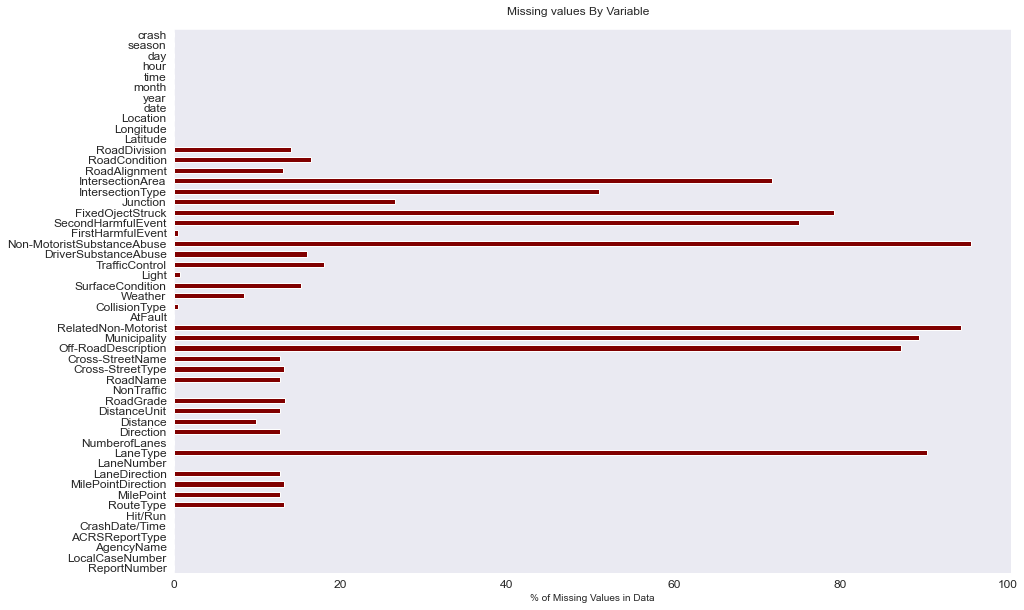

In [68]:
    missing_var = 100*CRI_features.isnull().sum()/CRI_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot1 = missing_var.plot(kind='barh',figsize=(15,10), grid = False,label="Percentage",color='maroon',fontsize=12)
    plot1.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=12,ha='center')
    plt.savefig('images/missing_var_CRI.jpg')
    # Add this loop to add the annotations

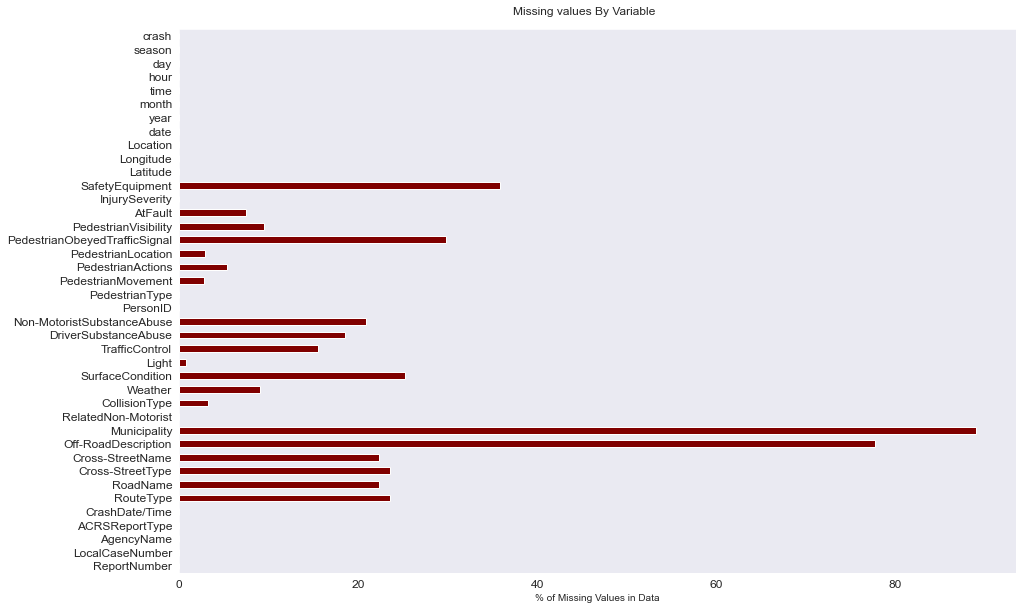

In [69]:
    missing_var = 100*CRNM_features.isnull().sum()/CRNM_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot1 = missing_var.plot(kind='barh',figsize=(15,10), grid = False,label="Percentage",color='maroon',fontsize=12)
    plot1.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=12,ha='center')
    plt.savefig('images/missing_var_CRNM.jpg')
    # Add this loop to add the annotations

In [70]:
 # Replace all NaN's by 0
#CRNM_new = CRNM_features.fillna(0)

#Renaming the column and replacing 
CRNM_new =  CRNM_features.rename(columns={"AgencyName": "Agency"})
CRNM_new = CRNM_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRNM_new.head()

ReportNumber  LocalCaseNumber Agency ACRSReportType      CrashDate/Time  \
0  MCP2439000D         14064779    MCP   Injury Crash 2015-01-01 18:00:00   
1   DD5508000L         15000253    RPD   Injury Crash 2015-01-02 11:51:00   
2  MCP2690000N         15000473    MCP   Injury Crash 2015-01-03 20:31:00   
3  MCP27650015         15000583    MCP   Injury Crash 2015-01-04 14:55:00   
4  MCP9379000G         15000697    MCP   Injury Crash 2015-01-05 12:23:00   

          RouteType      RoadName Cross-StreetType Cross-StreetName  \
0            County    CONTOUR RD           County   HORIZON RUN RD   
1               NaN           NaN              NaN              NaN   
2               NaN           NaN              NaN              NaN   
3               NaN           NaN              NaN              NaN   
4  Maryland (State)  FREDERICK RD     Municipality   KING FARM BLVD   

                                Off-RoadDescription  ...  Longitude  \
0                                               NaN  ... -77.197752   
1               Parking Lot of 14939 Shady Grove Rd  ... -77.192452   
2             Parking Lot 13 at 11219 Grandview Ave  ... -77.051365   
3  Parking lot of Giant Food (12051 Rockville Pike)  ... -77.087983   
4                                               NaN  ... -77.168492   

                      Location                date  year month      time hour  \
0     (39.1552397, -77.197752) 2015-01-01 18:00:00  2015     1  18:00:00   18   
1  (39.09749501, -77.19245195) 2015-01-02 11:51:00  2015     1  11:51:00   11   
2  (39.03882591, -77.05136508) 2015-01-03 20:31:00  2015     1  20:31:00   20   
3  (38.96282667, -77.08798333) 2015-01-04 14:55:00  2015     1  14:55:00   14   
4    (39.116905, -77.16849167) 2015-01-05 12:23:00  2015     1  12:23:00   12   

        day  season crash  
0  Thursday  Winter     1  
1    Friday  Winter     1  
2  Saturday  Winter     1  
3    Sunday  Winter     1  
4    Monday  Winter     1  

[5 rows x 40 columns]

In [71]:
CRNM_new['Rush_time']=CRNM_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRNM(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"


In [72]:
#apply function   
CRNM_new['Rush_time']= CRNM_new['Rush_time'].apply(rushhour_CRNM)
#CRNM_new.head()

In [73]:
CRNM_final = CRNM_new.fillna(0)
CRNM_final.head()

ReportNumber  LocalCaseNumber Agency ACRSReportType      CrashDate/Time  \
0  MCP2439000D         14064779    MCP   Injury Crash 2015-01-01 18:00:00   
1   DD5508000L         15000253    RPD   Injury Crash 2015-01-02 11:51:00   
2  MCP2690000N         15000473    MCP   Injury Crash 2015-01-03 20:31:00   
3  MCP27650015         15000583    MCP   Injury Crash 2015-01-04 14:55:00   
4  MCP9379000G         15000697    MCP   Injury Crash 2015-01-05 12:23:00   

          RouteType      RoadName Cross-StreetType Cross-StreetName  \
0            County    CONTOUR RD           County   HORIZON RUN RD   
1                 0             0                0                0   
2                 0             0                0                0   
3                 0             0                0                0   
4  Maryland (State)  FREDERICK RD     Municipality   KING FARM BLVD   

                                Off-RoadDescription  ...  \
0                                                 0  ...   
1               Parking Lot of 14939 Shady Grove Rd  ...   
2             Parking Lot 13 at 11219 Grandview Ave  ...   
3  Parking lot of Giant Food (12051 Rockville Pike)  ...   
4                                                 0  ...   

                      Location                date  year month      time hour  \
0     (39.1552397, -77.197752) 2015-01-01 18:00:00  2015     1  18:00:00   18   
1  (39.09749501, -77.19245195) 2015-01-02 11:51:00  2015     1  11:51:00   11   
2  (39.03882591, -77.05136508) 2015-01-03 20:31:00  2015     1  20:31:00   20   
3  (38.96282667, -77.08798333) 2015-01-04 14:55:00  2015     1  14:55:00   14   
4    (39.116905, -77.16849167) 2015-01-05 12:23:00  2015     1  12:23:00   12   

        day  season crash   Rush_time  
0  Thursday  Winter     1     Evening  
1    Friday  Winter     1         Day  
2  Saturday  Winter     1     Evening  
3    Sunday  Winter     1   Afternoon  
4    Monday  Winter     1  Lunch Rush  

[5 rows x 41 columns]

**Here onwards, I splitted entire data frame into two new data frames. One data is from 2015-2019 and another for the year 2020.** 

In [74]:
CRNM_is_2020 =CRNM_final['year']==2020
CRNM_is_2019 = CRNM_final['year'] != 2020
#Creating Dataframe only for the year 2020
CRNM_final_2020 = CRNM_final[CRNM_is_2020]
#Data from 2015- 2019
CRNM_final_2019 = CRNM_final[CRNM_is_2019]
print("Size of the original data frame:",CRNM_final.shape)
print("Size of the original data frame from 2015-2019:", CRNM_final_2019.shape)
print("Size of the original data frame for the year 2020:", CRNM_final_2020.shape)

Size of the original data frame: (3849, 41)
Size of the original data frame from 2015-2019: (3347, 41)
Size of the original data frame for the year 2020: (502, 41)


# Exploratory Data Analysis and Visualization (Motorists and Non-Motorists)<a class="anchor" id="sec5"></a> 

## Questions to Research 

### Question 1 : How does number of crashes change over year, month and season? Which month has the highest number of crashes? Are they consistent?

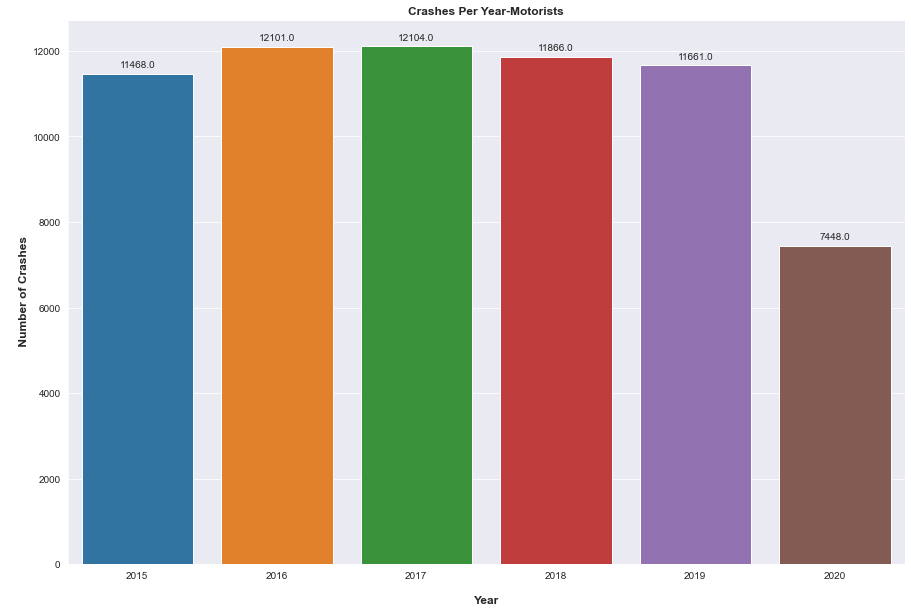

In [75]:
crashperyear_CRI = CRI_final.groupby(['year'])['crash'].count()
# sns barplot
plt.figure(figsize=(15,10))
cri_y = sns.barplot(crashperyear_CRI.index,crashperyear_CRI.values)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Crashes Per Year-Motorists",fontsize=12, fontweight="bold")
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
for p in cri_y.patches:
    cri_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
#plt.tight_layout()

plt.savefig('images/crashperyear_CRI.jpg')

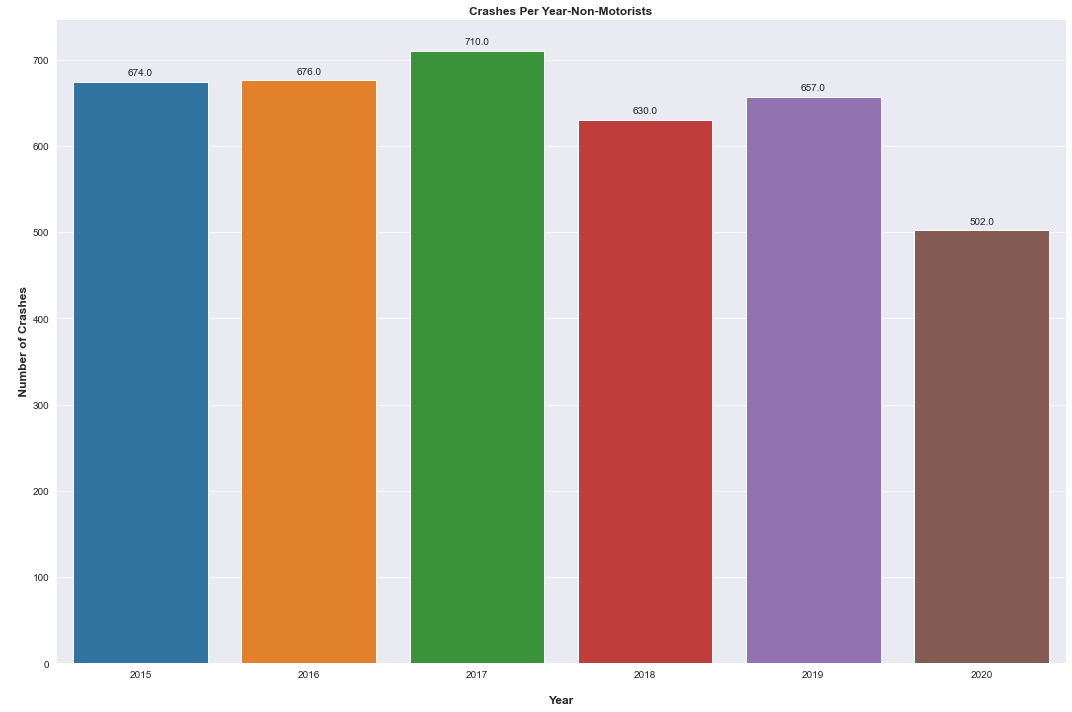

In [76]:
crashperyear_CRNM = CRNM_final.groupby(['year'])['crash'].count()
# sns barplot
plt.figure(figsize=(15,10))
crnm_y=sns.barplot(crashperyear_CRNM.index,crashperyear_CRNM.values)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Crashes Per Year-Non-Motorists",fontsize=12, fontweight="bold")
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.savefig('images/crashperyear_crnm.jpg')
for p in crnm_y.patches:
    crnm_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()
plt.savefig('images/crashperyear_CRNM.jpg')

Minor variations on a yearly basis is expected. A significant drop in the number of violation in 2020 can be attributed to decrease in traffic due to the pandemic.

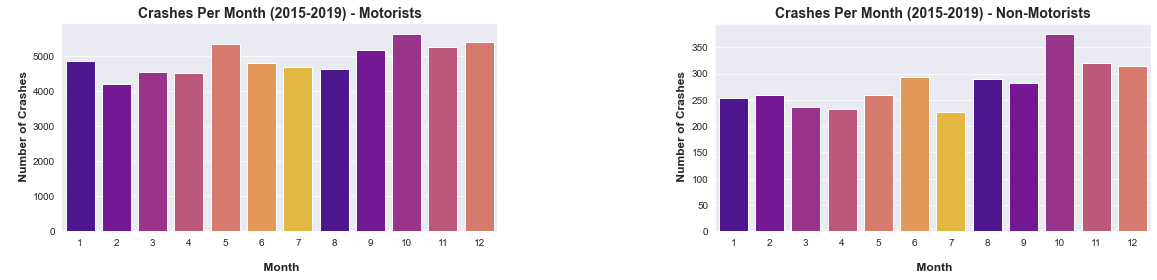

In [77]:
crashpermonth_CRI = CRI_final_2019.groupby(['month'])['crash'].count()
crashpermonth_CRNM = CRNM_final_2019.groupby(['month'])['crash'].count()
plt.figure(figsize=(8,8))
colors = sns.color_palette("plasma", n_colors=7)
plt.subplot(1, 2, 1)
sns.barplot(crashpermonth_CRI.index,crashpermonth_CRI.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Month (2015-2019) - Motorists",fontsize=14,fontweight="bold")
plt.xlabel("\n Month", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
sns.barplot(crashpermonth_CRNM.index,crashpermonth_CRNM.values, palette=colors)
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.title("Crashes Per Month (2015-2019) - Non-Motorists",fontsize=14,fontweight="bold")
plt.xlabel("\n Month", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.savefig('images/crashpermonth.jpg')

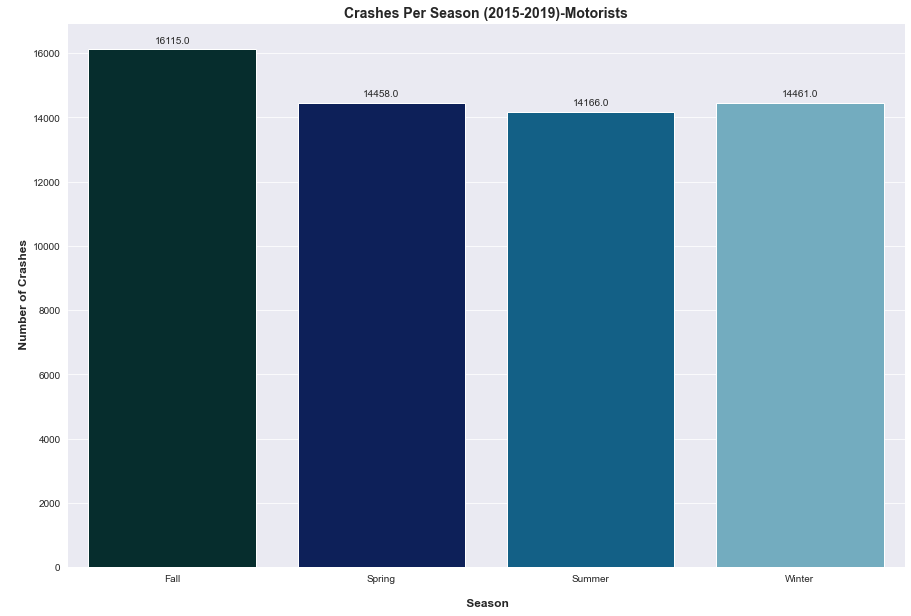

In [78]:
crashperseason_CRI = CRI_final_2019.groupby(['season'])['crash'].count()
plt.figure(figsize=(15,10))
colors = sns.color_palette("plasma", n_colors=7)
cri_s = sns.barplot(crashperseason_CRI.index,crashperseason_CRI.values, palette='ocean')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Season (2015-2019)-Motorists",fontsize=14,fontweight="bold")
plt.xlabel("\n Season", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
for p in cri_s.patches:
    cri_s.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.savefig('images/crashperseason_cri.jpg')

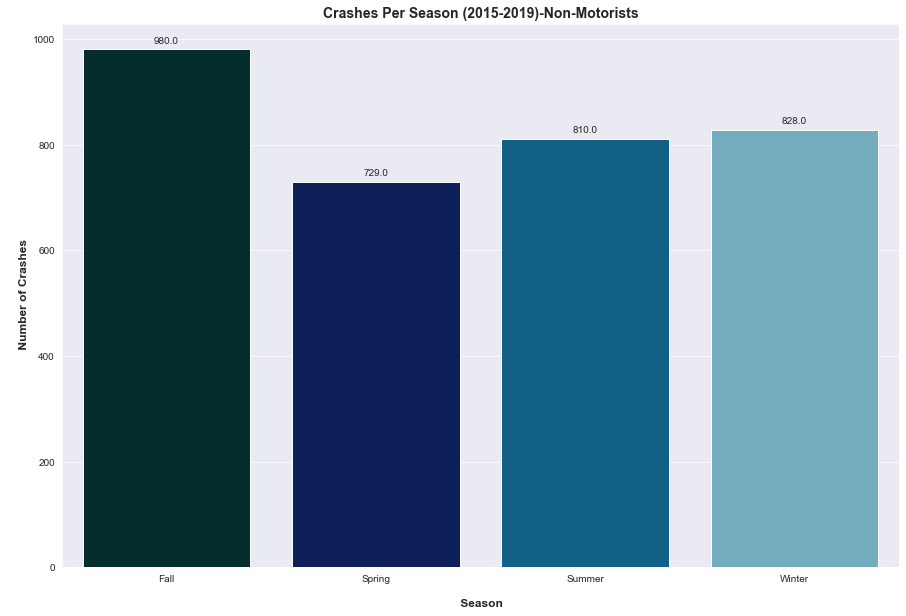

In [79]:
crashperseason_CRNM = CRNM_final_2019.groupby(['season'])['crash'].count()
plt.figure(figsize=(15,10))
colors = sns.color_palette("plasma", n_colors=7)
crnm_s = sns.barplot(crashperseason_CRNM.index,crashperseason_CRNM.values, palette='ocean')
plt.title("Crashes Per Season (2015-2019)-Non-Motorists",fontsize=14,fontweight="bold")
plt.xlabel("\n Season", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
for p in crnm_s.patches:
    crnm_s.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.savefig('images/crashperseason_crnm.jpg')

Here Fall Season has highest number of crashes in both the cases.

## Question 2 : What days of the week had the highest number of violations and how do they change over the years?

To answer this, heatmap visualization is used.

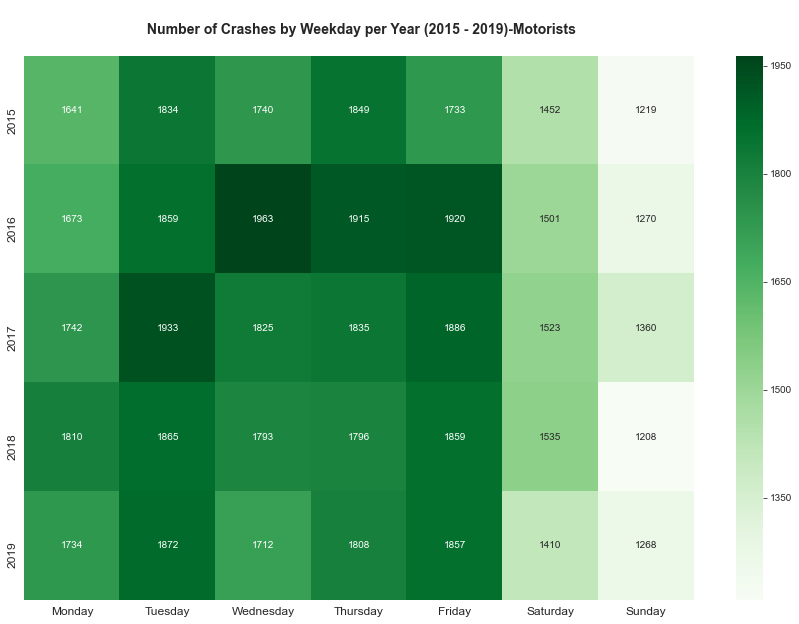

In [80]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
crashweekday_CRI = CRI_final_2019.groupby(['year', 'day']).size()
crashweekday_CRI = crashweekday_CRI.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(crashweekday_CRI,annot=True, fmt="d",cmap="Greens")
plt.title('\n Number of Crashes by Weekday per Year (2015 - 2019)-Motorists\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/crashbyweekdayperyear_cri.jpg')

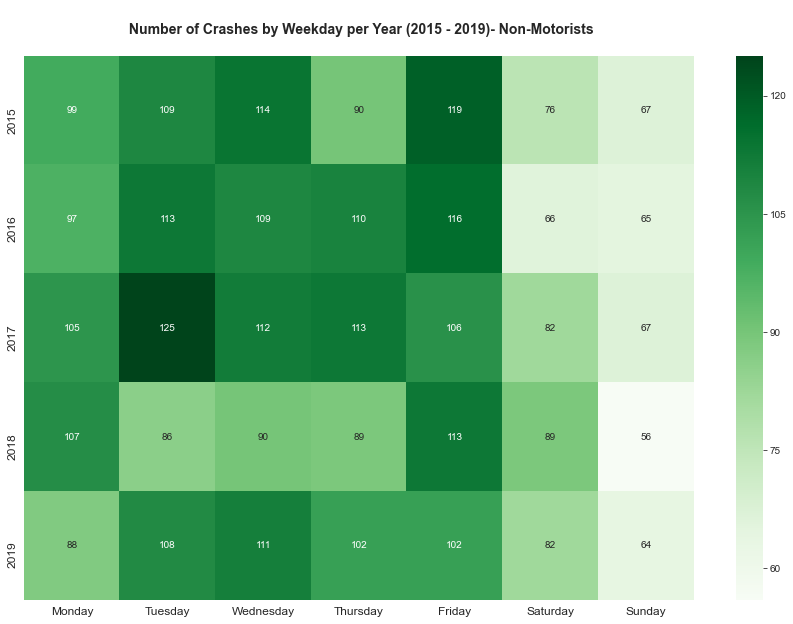

In [81]:
crashweekday_CRNM = CRNM_final_2019.groupby(['year', 'day']).size()
crashweekday_CRNM = crashweekday_CRNM.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(crashweekday_CRNM, annot=True, fmt="d",cmap="Greens")
plt.title('\n Number of Crashes by Weekday per Year (2015 - 2019)- Non-Motorists\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/crashbyweekdayperyear_crnm.jpg')

Other than Weekend, Incident of crashes almost equally distributed in the weekdays!

### Rush-hour Traffic -Motorists

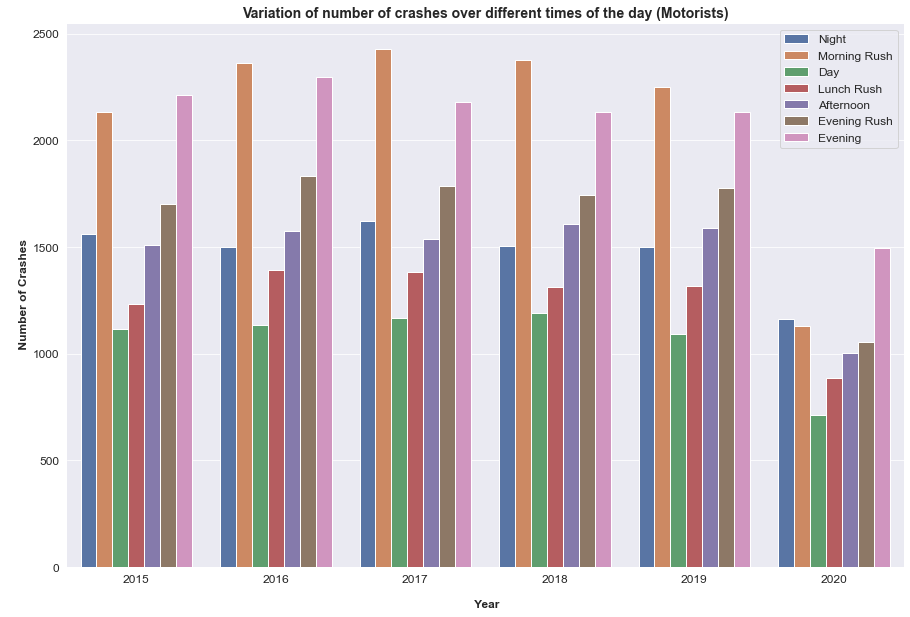

In [82]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"

plt.figure(figsize=(15,10))
ax=sns.countplot('year', hue ='Rush_time', 
              palette="deep", data=CRI_final)
plt.title("Variation of number of crashes over different times of the day (Motorists)",fontsize=14,fontweight="bold")
plt.xlabel("\n Year", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)

plt.savefig('images/crash_rushtime_year_CRI.jpg')

The maximum number of crashes happened in the Morning.

### Rush-hour Traffic - Non-Motorists

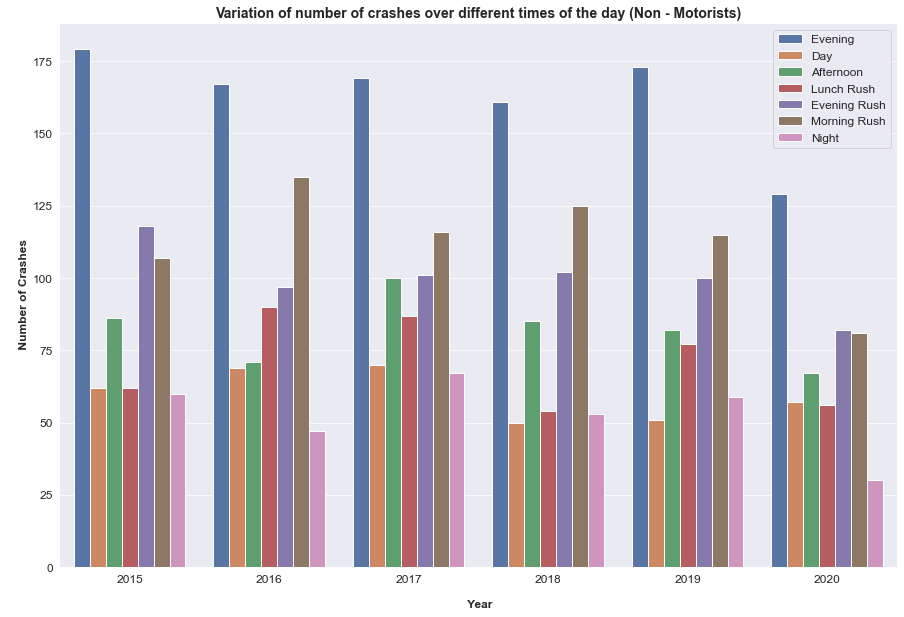

In [83]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"

plt.figure(figsize=(15,10))

ax=sns.countplot('year', hue ='Rush_time', 
              palette="deep", data=CRNM_final)
plt.title("Variation of number of crashes over different times of the day (Non - Motorists)",fontsize=14,fontweight="bold")
plt.xlabel("\n Year", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('images/crash_rushtime_year_CRNM.jpg')

The maximum number of crashes occur in the Evening ! 

## Question 3 : What damage was caused due to the crash?


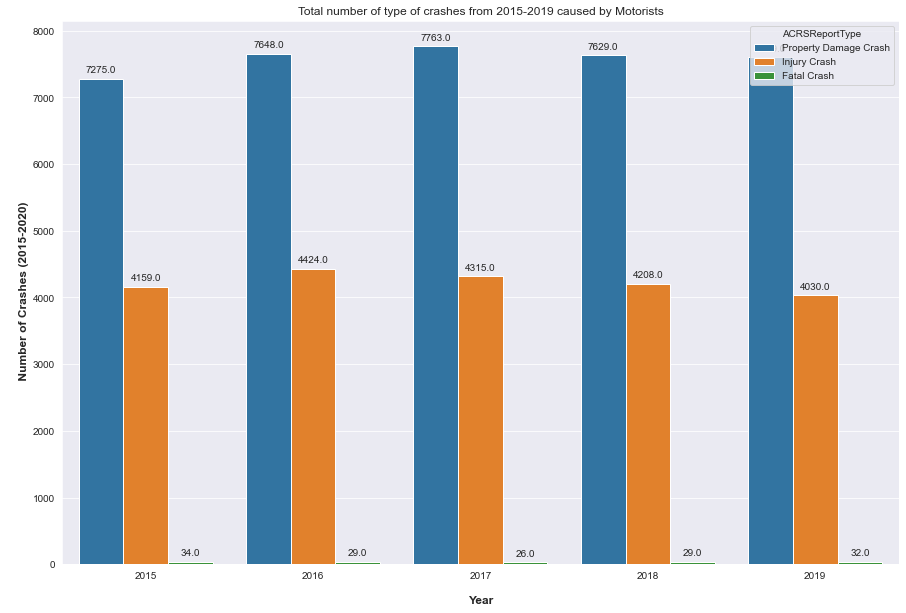

In [84]:
plt.figure(figsize=(15,10))
cri_ac = sns.countplot('year', hue="ACRSReportType",  data=CRI_final_2019)
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes (2015-2020)", fontsize=12, fontweight="bold")
plt.title('Total number of type of crashes from 2015-2019 caused by Motorists')
for p in cri_ac.patches:
    cri_ac.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.savefig('images/CRI_CRNM_crashtype_cri.jpg')


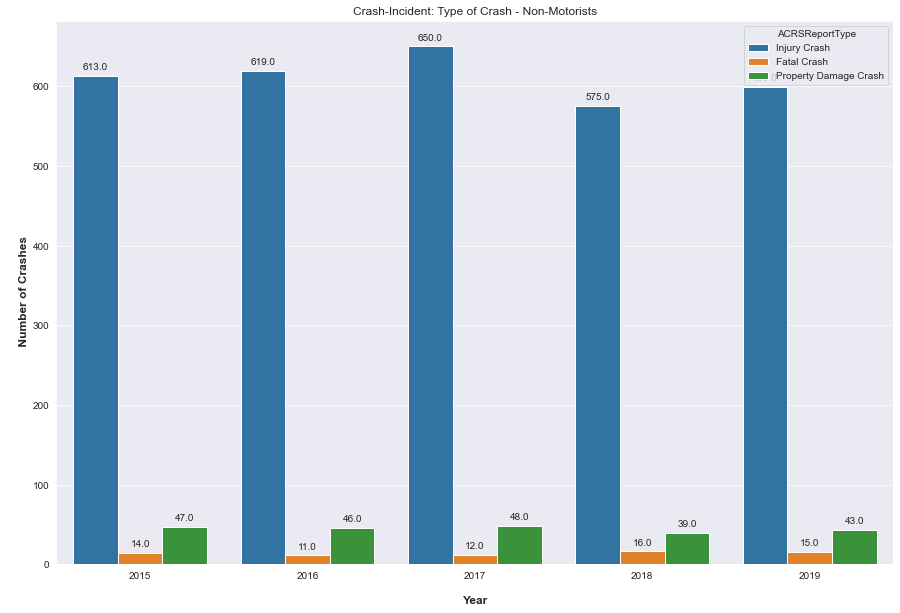

In [85]:
plt.figure(figsize=(15,10))
crnm_ac=sns.countplot('year', hue="ACRSReportType",  data=CRNM_final_2019)
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.title('Crash-Incident: Type of Crash - Non-Motorists')
for p in crnm_ac.patches:
    crnm_ac.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.savefig('images/CRI_CRNM_crashtype_crnm.jpg')


Motorists crashes ended up with large number of property damage where as Injury Crash is more for crashes where non-motorists involved.

## Question 4: What is the weather, surface and light condition when the most crashes occurred?

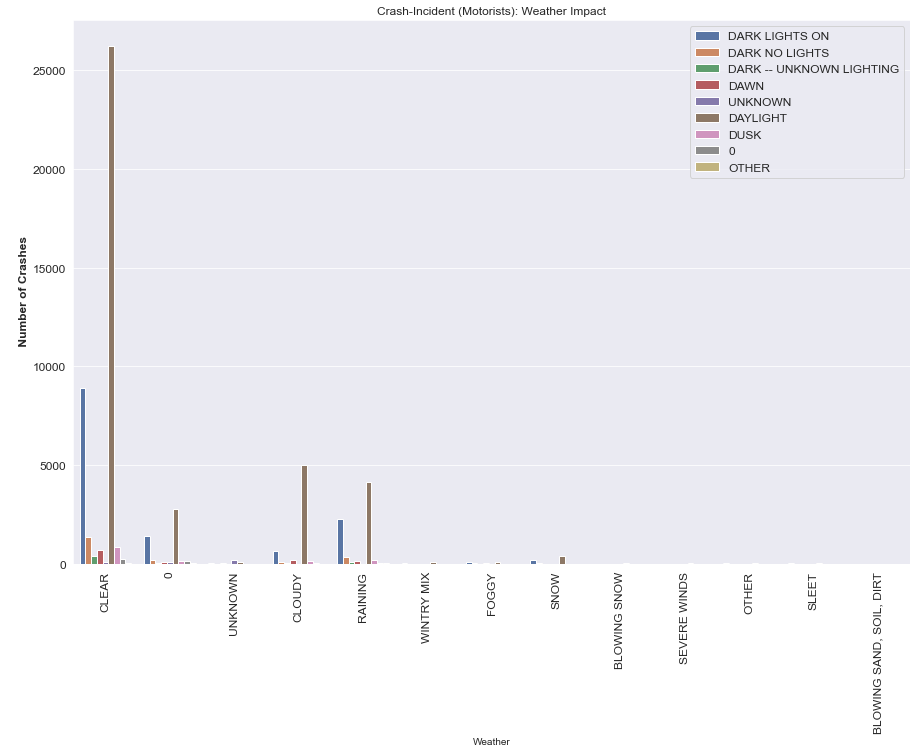

In [86]:
plt.figure(figsize=(15,10))
cri_w = sns.countplot('Weather', hue="Light", palette="deep", data=CRI_final_2019)
plt.legend(fontsize='12', loc = 'upper right')
plt.title('Crash-Incident (Motorists): Weather Impact')
# for p in cri_w.patches:
#     cri_w.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12,rotation =90)
plt.yticks(fontsize=12)
plt.savefig('images/CRI_weather_impact.jpg')

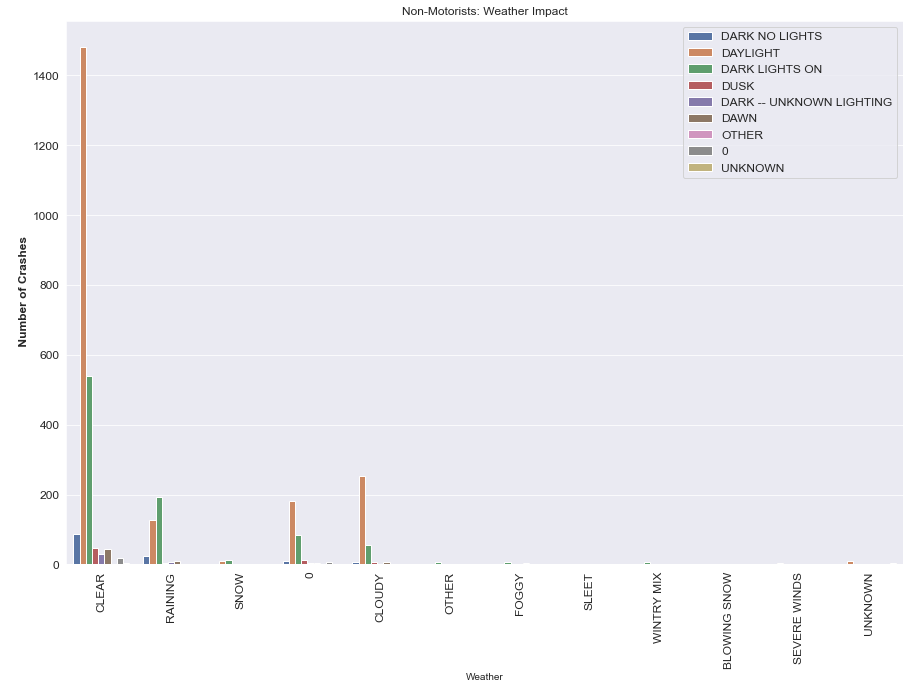

In [87]:
plt.figure(figsize=(15,10))
sns.countplot('Weather', hue="Light", palette="deep", data=CRNM_final_2019)
plt.title('Non-Motorists: Weather Impact')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12,rotation =90)
plt.yticks(fontsize=12)
plt.savefig('images/CRNM_weather_impact.jpg')

Most of the crashes occured whn weather was clear ! Here 0 represents missing values !

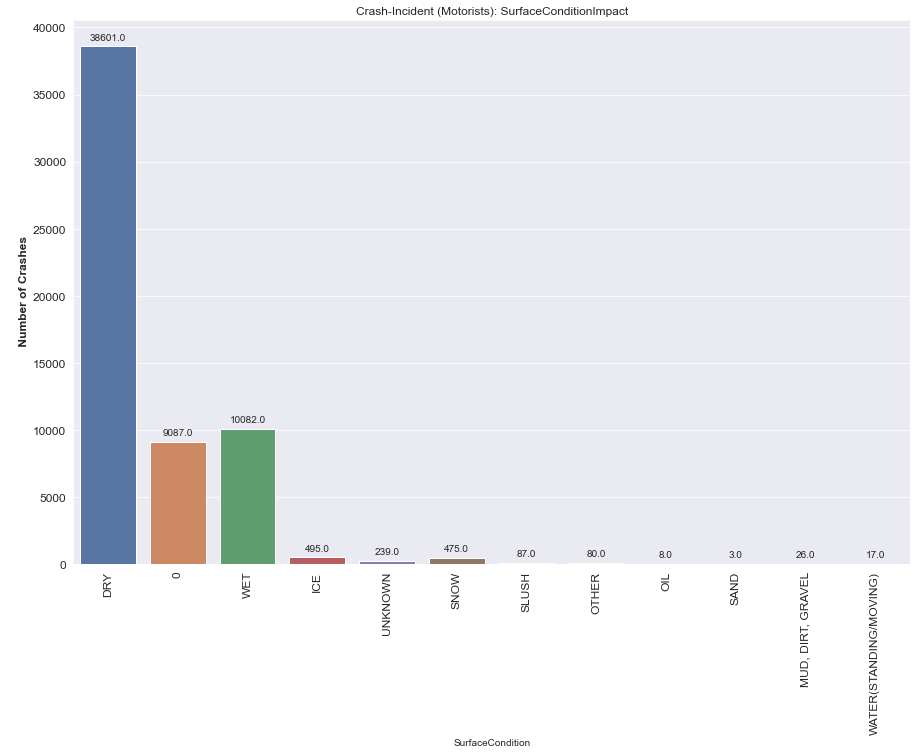

In [88]:
plt.figure(figsize=(15,10))
cri_surf = sns.countplot("SurfaceCondition", palette="deep", data=CRI_final_2019)
#plt.legend(fontsize='12', loc = 'upper right')
plt.title('Crash-Incident (Motorists): SurfaceConditionImpact')
plt.xticks(fontsize=12,rotation =90)
plt.yticks(fontsize=12)
for p in cri_surf .patches:
    cri_surf .annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.savefig('images/CRI_SurfaceCondition_impact.jpg')

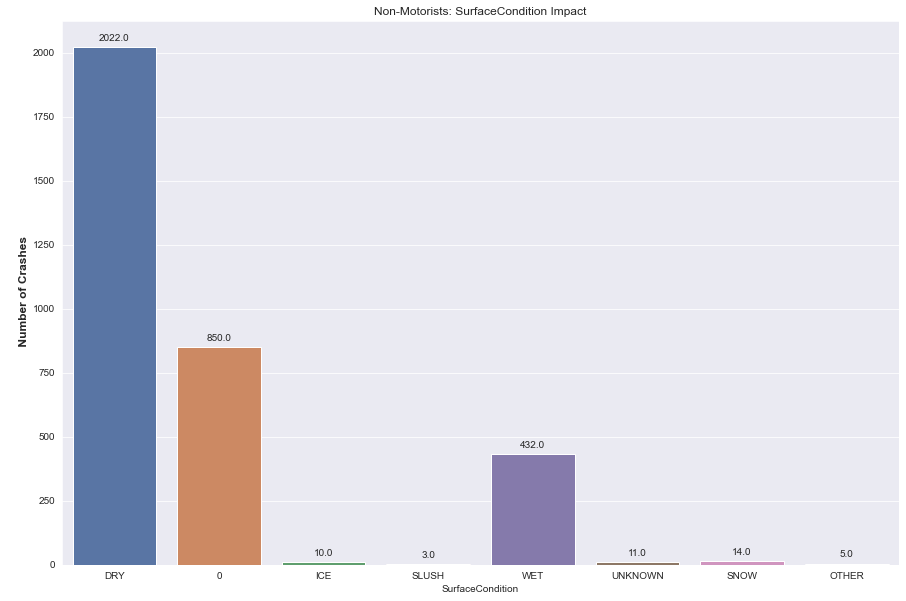

In [89]:
plt.figure(figsize=(15,10))
crnm_surf = sns.countplot("SurfaceCondition", palette="deep", data=CRNM_final_2019)
plt.title('Non-Motorists: SurfaceCondition Impact')

for p in crnm_surf .patches:
    crnm_surf .annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.savefig('images/CRNM_SurfaceCondition_impact.jpg')

It can be conclusively said, most of the crashes have happened in clear weather, daylight and dry surface conditions! This is confirms that ost of the people step out during the day when weather is clear.

## Type of Non-Motorists involved in Crashes

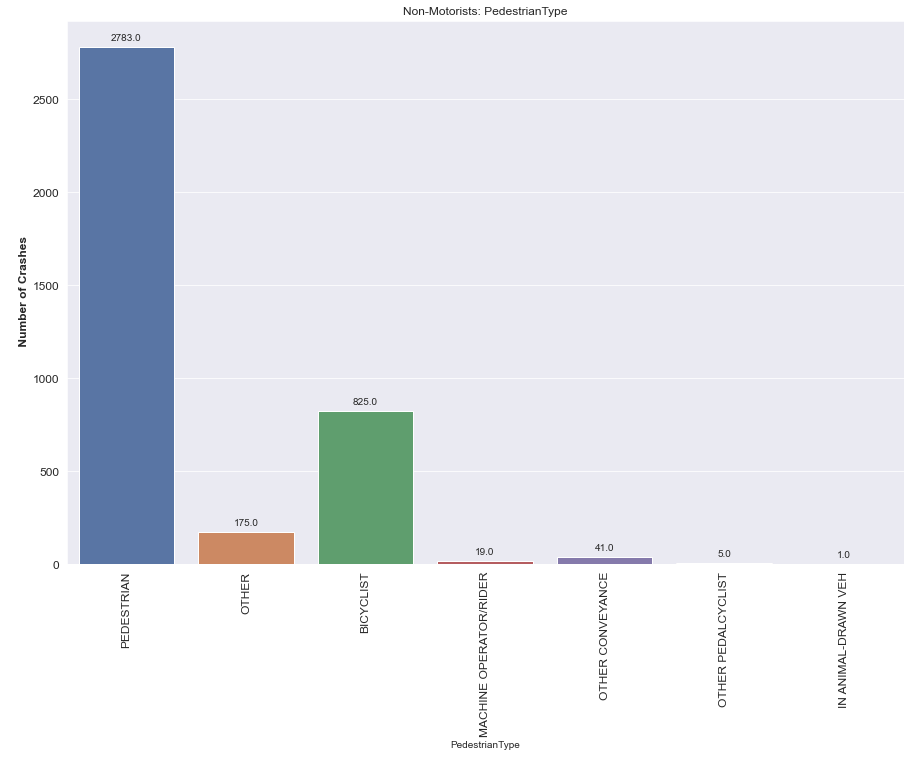

In [90]:
plt.figure(figsize=(15,10))
crnm_nm = sns.countplot("PedestrianType", palette="deep", data=CRNM_final)
plt.title('Non-Motorists: PedestrianType')
plt.xticks(fontsize=12,rotation =90)
plt.yticks(fontsize=12)
for p in crnm_nm .patches:
    crnm_nm .annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.savefig('images/CRNM_pedestrian.jpg')

# <b> Time-Series Analysis and Forecasting Number of Crashes caused by Motorists</b> <a class="anchor" id="sec6"></a> 

Time series plot is used to visualise how a given metric changes over time. Time series analysis helps to identify and explain:
* Any regularity or systematic variation in the series of data which is due to seasonality.
* Cyclical patterns that repeat any two or three years or more.
* Trends in the data.
* Growth rates of these trends.
 

Before the analysis, I have split the data into two data frames.  Here we see how "number of crashes" varies between 2015 and 2019. It has also been analyzed for the year 2020. Later, it has been used to forecast crash incidents.

In [91]:
#2015-2020
#Creating a new dataframe for time series analysis with date as an index
CRI_timeseries_2019 = CRI_final_2019.copy()
CRI_timeseries_2019.rename(columns = {'CrashDate/Time':'CrashDate_Time'}, inplace = True) 
CRI_timeseries_2019['date'] = pd.to_datetime(CRI_timeseries_2019['date'])
CRI_timeseries_2019 = CRI_timeseries_2019.set_index('date')

#Data for the year 2020
CRI_timeseries_2020 = CRI_final_2020.copy()
CRI_timeseries_2020.rename(columns = {'CrashDate/Time':'CrashDate_Time'}, inplace = True) 
CRI_timeseries_2020['date'] = pd.to_datetime(CRI_timeseries_2020['date'])
CRI_timeseries_2020 = CRI_timeseries_2020.set_index('date')
#CRI_timeseries_2020.head()

In order to use *Prophet*,  we need to rename the columns in our data to the correct format. The **Date column** must be called **'ds'** and the number of crashe column we want to **predict 'y'**. 

In [92]:
#plt.rcdefaults()
CRI_per_day_2020=CRI_timeseries_2020['crash'].groupby(CRI_timeseries_2020.index.date).sum()
CRI_per_day_2019=CRI_timeseries_2019['crash'].groupby(CRI_timeseries_2019.index.date).sum()

CRI_timeseries_prophet_2019 = pd.DataFrame(CRI_per_day_2019)
CRI_timeseries_prophet_2019 = CRI_timeseries_prophet_2019.rename(columns={'crash' : 'y'})
CRI_timeseries_prophet_2019['ds'] = CRI_timeseries_prophet_2019.index

CRI_timeseries_prophet_2020 = pd.DataFrame(CRI_per_day_2020)
CRI_timeseries_prophet_2020 = CRI_timeseries_prophet_2020.rename(columns={'crash' : 'y'})
CRI_timeseries_prophet_2020['ds'] = CRI_timeseries_prophet_2020.index

print("Time series data frame 2015-2019:\n",CRI_timeseries_prophet_2019 .head())
print("\n____________________________________________________________________________\n")
print("Time series data frame 2020:\n",CRI_timeseries_prophet_2020 .head())

Time series data frame 2015-2019:
              y          ds
2015-01-01  26  2015-01-01
2015-01-02  22  2015-01-02
2015-01-03  37  2015-01-03
2015-01-04  25  2015-01-04
2015-01-05  25  2015-01-05

____________________________________________________________________________

Time series data frame 2020:
              y          ds
2020-01-01  15  2020-01-01
2020-01-02  32  2020-01-02
2020-01-03  51  2020-01-03
2020-01-04  34  2020-01-04
2020-01-05  22  2020-01-05


Before fitting the model, the below visualization shows how the number of crashes varies from 2015 to 2019.

In [93]:
fig_crash_2020 = CRI_timeseries_prophet_2020.iplot(kind='scatter',title='Crashes Per Day for the year 2020', color='red', filename='images/myplot.html')
plt.savefig('images/fig_crash_2020.jpg')

<Figure size 432x288 with 0 Axes>

Below visualization shows how the number of crashes varies in the year 2020.

In [94]:
fig_crash_2019 = CRI_timeseries_prophet_2019.iplot(kind='scatter', title='Crashes Per Day (2015-2019)',color="blue")
plt.savefig('images/fig_crash_2019.jpg')

<Figure size 432x288 with 0 Axes>

It is more or less what we would expect: yearly trends, weekly trends and a slow upwards growth, with lots of outliers along the way.


In [95]:
CRI_timeseries_prophet_2019.head()

y          ds
2015-01-01  26  2015-01-01
2015-01-02  22  2015-01-02
2015-01-03  37  2015-01-03
2015-01-04  25  2015-01-04
2015-01-05  25  2015-01-05

In [136]:
CRI_timeseries_prophet_2020.head()

y          ds
2020-01-01  15  2020-01-01
2020-01-02  32  2020-01-02
2020-01-03  51  2020-01-03
2020-01-04  34  2020-01-04
2020-01-05  22  2020-01-05

## Predicting Future Crash related to Mototrists using *Facebook Prophet*

The [Facebook Prophet](https://facebook.github.io/prophet/) package was released in 2017 for Python and R. Prophet is designed for analyzing time series with daily observations that display patterns on different time scales. It is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

### Model Description
The Prophet model has the form $$ y(t) = g(t)+s(t)+h(t)+\epsilon_t \;\; where,$$  
* $g(t)$ is the trend function.
* $s(t)$ is the periodic component (seasonalities).
* $h(t)$ represents holidays/events which occur on potentially irregular basis.
* $\epsilon_t$ is the error term (which is often assumed to be normally distributed)



## Fitting the Prophet Model - Motorists Data

We need to create what is called a future dataframe. We specify the number of future periods to predict (two years) and the frequency of predictions (weekly). We then make predictions with the prophet model we created and the future dataframe:


In [ ]:
def generate_time_series_df(start_date, end_date, freq):
    """Generate time series sample data."""
    date_range = pd.date_range(start=start_date, end=end_date, freq=freq)

    CRI_timeseries_prophet_2019_new = pd.DataFrame(data={'ds': date_range})
    
    # Get date variables. 
    CRI_timeseries_prophet_2019_new ['day_of_month'] = CRI_timeseries_prophet_2019_new['ds'].dt.day
    CRI_timeseries_prophet_2019_new ['month'] = CRI_timeseries_prophet_2019_new ['ds'].dt.month
    CRI_timeseries_prophet_2019_new ['daysinmonth'] = CRI_timeseries_prophet_2019_new ['ds'].dt.daysinmonth
    CRI_timeseries_prophet_2019_new ['week'] = CRI_timeseries_prophet_2019_new ['ds'].dt.week

     # Target variable.
    CRI_timeseries_prophet_2019_new['y'] = CRI_timeseries_prophet_2019_new ['day_of_month'] \
        + CRI_timeseries_prophet_2019_new ['month'] \
        + CRI_timeseries_prophet_2019_new ['daysinmonth'] \
        + CRI_timeseries_prophet_2019_new ['week'] \

    return CRI_timeseries_prophet_2019_new

CRI_timeseries_prophet_2019_new  = generate_time_series_df(
    start_date='2015-01-01', 
    end_date='2019-12-31', 
    freq='D'
)

CRI_timeseries_prophet_2019_new.head()

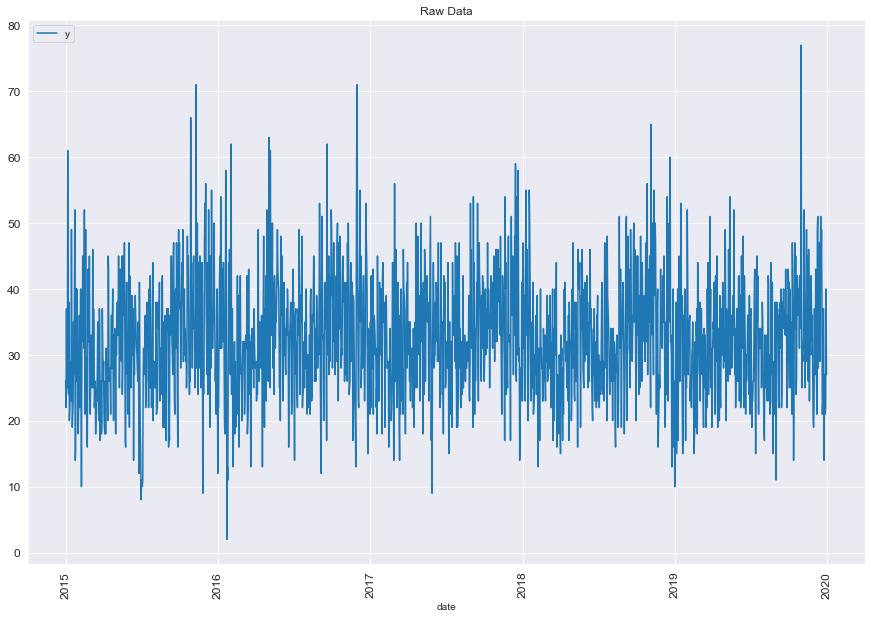

In [133]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='ds', y='y', label='y', data=CRI_timeseries_prophet_2019, ax=ax)
ax.legend(loc='upper left')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
ax.set(title='Raw Data', xlabel='date', ylabel='');
plt.savefig('images/fig_crash_2019_u.jpg')

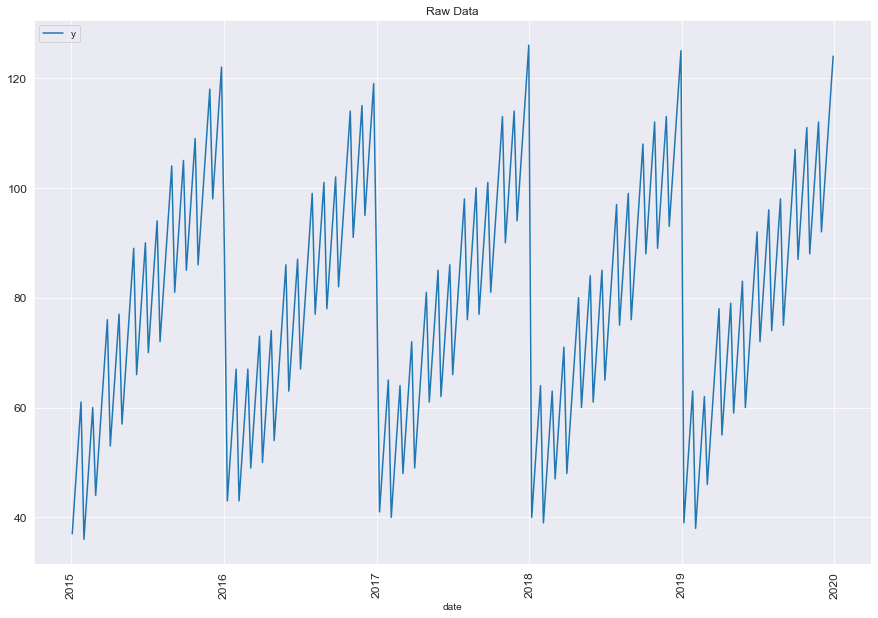

In [134]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='ds', y='y', label='y', data=CRI_timeseries_prophet_2019_new, ax=ax)
ax.legend(loc='upper left')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
ax.set(title='Raw Data', xlabel='date', ylabel='');
plt.savefig('images/fig_crash_2019_new.jpg')

## Model Building

In [99]:
def build_model():
    """Define forecasting model."""
    # Create holidays data frame. 
    #holidays = create_end_of_year_holydays_df()
    
    model = fbprophet.Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False, 
        #holidays = holidays, 
        interval_width=0.95, 
        mcmc_samples = 500,
        changepoint_prior_scale=0.5,
        changepoint_range=0.9
    )

    model.add_seasonality(
        name='monthly', 
        period=30.5, 
        fourier_order=5
    )
    
    return model
    
CRI_prophet_model_2019 = build_model()
CRI_prophet_model_2019_new = build_model()

## Model Fitting

In [100]:
CRI_prophet_model_2019_new.fit(CRI_timeseries_prophet_2019_new)
CRI_prophet_model_2019.fit(CRI_timeseries_prophet_2019)

## Model Prediction

In [101]:
future_dates_CRI_2019_new = CRI_prophet_model_2019_new.make_future_dataframe(periods=78, freq ='W') 
forecast_CRI_2019_new = CRI_prophet_model_2019_new.predict(future_dates_CRI_2019_new)

future_dates_CRI_2019 = CRI_prophet_model_2019.make_future_dataframe(periods=78, freq ='W') 
forecast_CRI_2019 = CRI_prophet_model_2019.predict(future_dates_CRI_2019)

In [102]:
forecast_CRI_2019_new.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2015-01-04  70.851480   44.648269   73.019977    64.842655    76.518843   
1 2015-01-11  71.527974   30.540335   58.544748    65.988581    76.640439   
2 2015-01-18  72.204469   30.760058   58.256819    67.152059    76.812513   
3 2015-01-25  72.880963   43.898193   69.901073    68.117108    76.962228   
4 2015-02-01  73.557457   24.879179   50.941492    69.255960    77.239175   

   additive_terms  additive_terms_lower  additive_terms_upper    monthly  \
0      -12.005060            -16.380132             -7.587993 -10.543707   
1      -26.607393            -31.246996            -22.141737  -3.360789   
2      -27.569478            -32.306040            -22.573713   4.926983   
3      -15.887409            -20.093326            -11.139322  13.694556   
4      -35.538173            -39.734882            -31.232155 -11.673835   

   monthly_lower  monthly_upper     yearly  yearly_lower  yearly_upper  \
0     -12.969249      -8.155717  -1.461353     -5.275973      2.362346   
1      -5.680554      -0.799030 -23.246604    -27.116669    -19.461355   
2       2.536623       7.435074 -32.496461    -36.443619    -28.674674   
3      11.123356      16.097477 -29.581965    -33.265901    -25.686218   
4     -14.077078      -9.243260 -23.864338    -27.915603    -19.780721   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  58.846420  
1                         0.0  44.920581  
2                         0.0  44.634990  
3                         0.0  56.993554  
4                         0.0  38.019284

#### Adjusting trend flexibility

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), we can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible and I set this to 0.5.

In [103]:
plot_plotly(CRI_prophet_model_2019, forecast_CRI_2019)


In [104]:
plot_plotly(CRI_prophet_model_2019_new, forecast_CRI_2019_new)

The black dots represent the actual values, the blue line indicates the forecasted values, and the light blue shaded region is the uncertainty.

**Prophet will provide a components plot which graphically describes the model it has fit:**

In [105]:
plot_components_plotly(CRI_prophet_model_2019_new, forecast_CRI_2019_new)
#plt.savefig('images/forecastcomponent_CRI_2019.jpg')

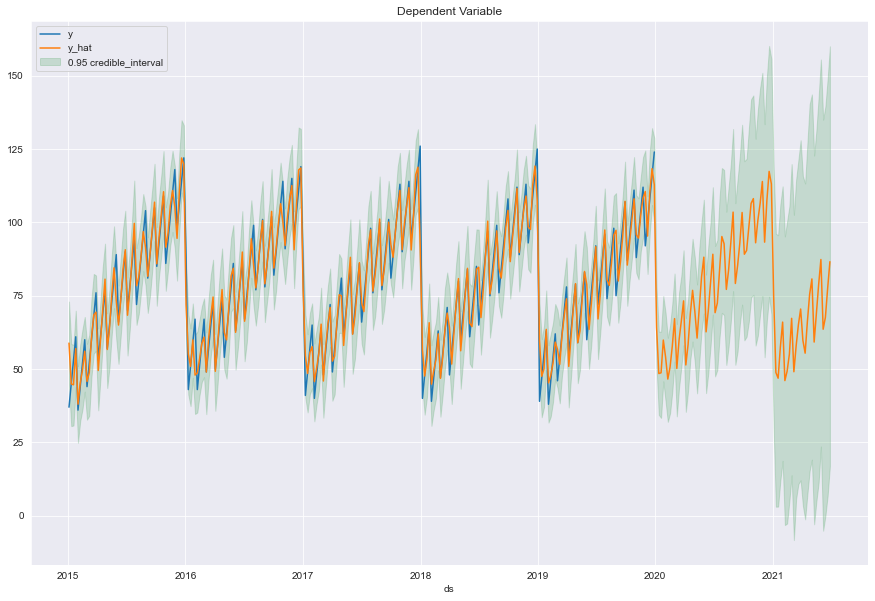

In [106]:
sns_c = sns.color_palette(palette='deep')
fig, ax = plt.subplots(figsize=(15,10))

ax.fill_between(
    x=forecast_CRI_2019_new['ds'],
    y1=forecast_CRI_2019_new['yhat_lower'],
    y2=forecast_CRI_2019_new['yhat_upper'],
    color=sns_c[2], 
    alpha=0.25,
    label=r'0.95 credible_interval'
)

sns.lineplot(x='ds', y='y', label='y', data=CRI_timeseries_prophet_2019_new, ax=ax)
sns.lineplot(x='ds', y='yhat', label='y_hat', data=forecast_CRI_2019_new, ax=ax)
ax.legend(loc='upper left')
ax.set(title='Dependent Variable', ylabel='');
plt.savefig('images/actual_forecast_CRI_2019.jpg')

## Performance Evaluation

R-square measures the proportion of variation in the dependent variable that can be attributed to the independent variable. The R-squared value R 2 is always between 0 and 1. In general, the higher the R–squared, the better the model fits your data.

In [107]:
metric_forecast_CRI_2019_new = forecast_CRI_2019_new.set_index('ds')[['yhat']].join(CRI_timeseries_prophet_2019_new.set_index('ds').y).reset_index()
metric_forecast_CRI_2019_new.dropna(inplace=True)
metric_forecast_CRI_2019_new.tail()

ds        yhat      y
256 2019-12-01  110.530353   92.0
257 2019-12-08   95.327556  100.0
258 2019-12-15  110.235850  108.0
259 2019-12-22  118.314878  116.0
260 2019-12-29  112.795535  124.0

In [108]:
print("r2 value from 2015-2020:",r2_score(metric_forecast_CRI_2019_new.y, metric_forecast_CRI_2019_new.yhat))
print('Mean Absolute Error:', mean_squared_error(metric_forecast_CRI_2019_new.y, metric_forecast_CRI_2019_new.yhat))
print('Mean Absolute Error:', mean_absolute_error(metric_forecast_CRI_2019_new.y, metric_forecast_CRI_2019_new.yhat))

r2 value from 2015-2020: 0.9220385508181345
Mean Absolute Error: 33.98962165042659
Mean Absolute Error: 3.505977602377629


In [109]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=CRI_timeseries_prophet_2019_new['ds'], y=CRI_timeseries_prophet_2019_new['y'], name='Actual',))
fig.add_trace(go.Scatter(x=forecast_CRI_2019_new['ds'], y=forecast_CRI_2019_new['yhat'], name='Predicted'))
# fig.add_trace(go.Scatter(x=forecast_CRI_2019_train['ds'], y=forecast_CRI_2019_train['yhat'], name='Predicted Train')) 
# fig.add_trace(go.Scatter(x=forecast_CRI_2019_test['ds'], y=forecast_CRI_2019_test['yhat'], name='Predicted Test'))
#fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['holidays'], name='Holidays',))
fig.update_layout(
    title="Actual (2015-2019) Vs Predicted (for 2 and half year)",
    xaxis_title="Date",
    yaxis_title="Number of Crashes",
       font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()
plt.savefig('images/actual_predicted_CRI_2019.jpg')

<Figure size 432x288 with 0 Axes>

# Points of Changes

Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. 

In the model, I have fixed **Prophet(changepoint_range=0.9)** meaning, first 90% of the time series.

In the following visualization, change-points have been added (where the trend model is shifting). The vertical lines in this figure indicate where the potential changepoints were placed.

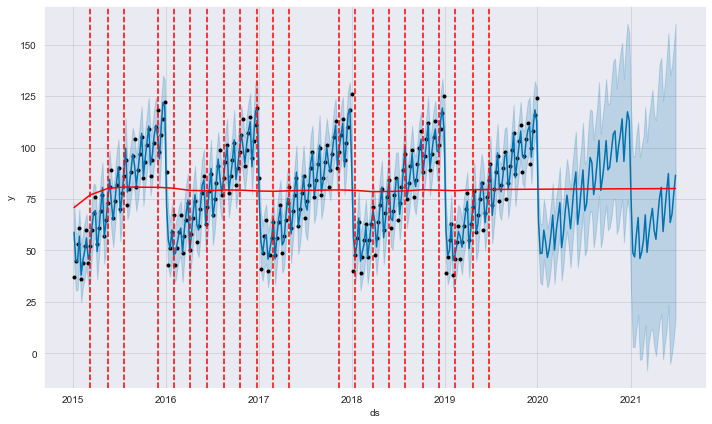

In [110]:
fig_2019=CRI_prophet_model_2019_new.plot(forecast_CRI_2019_new)
changes_2019=add_changepoints_to_plot(fig_2019.gca(),CRI_prophet_model_2019_new,forecast_CRI_2019_new)

## Autocorrelation (ACF) Plot

The ACF plot shows the correlation of the time series with its own lags. Each vertical line (on the autocorrelation plot) represents the correlation between the series and its lag starting from lag 0. The blue shaded region in the plot is the significance level. Those lags that lie above the blue line are the significant lags.


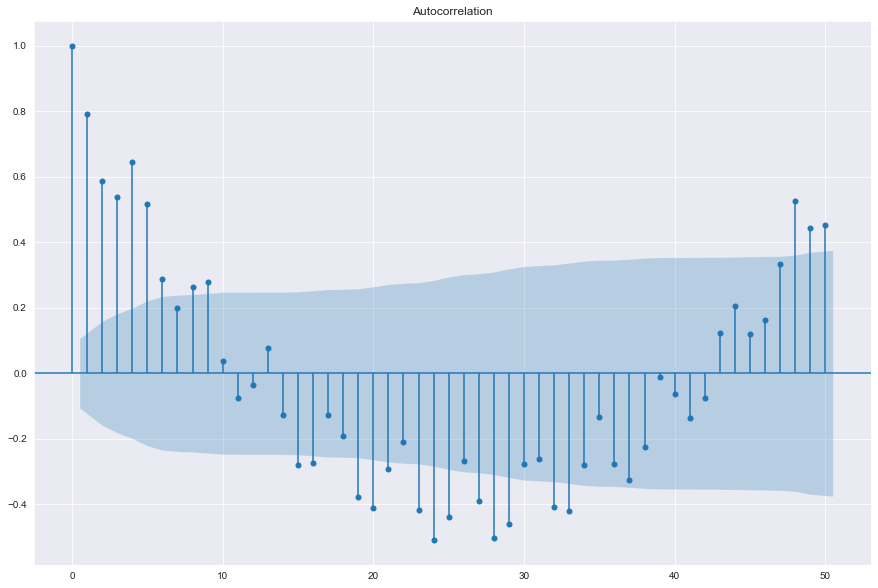

In [111]:
fig, ax = plt.subplots( figsize=(15,10) )
fig = plot_acf(forecast_CRI_2019_new.yhat, lags=50, ax=ax)
plt.savefig('images/pointofchange_CRI_2019.jpg')

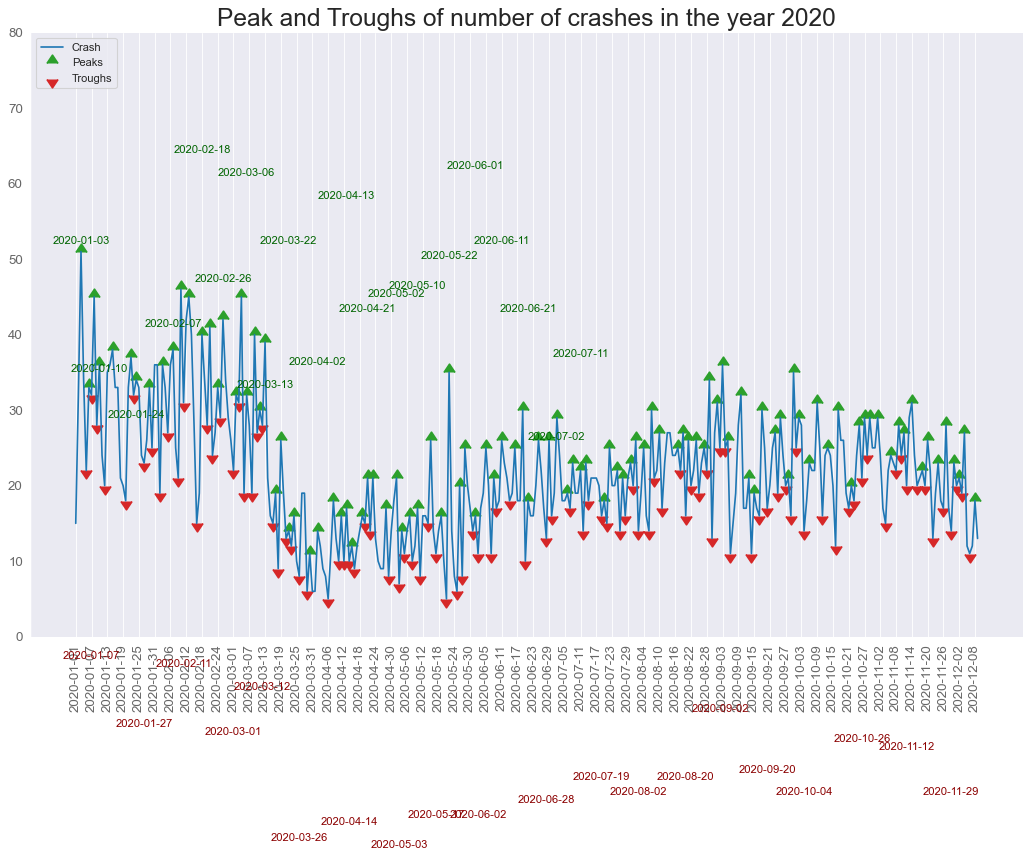

In [112]:
data = CRI_timeseries_prophet_2020['y'].values
# Get the Peaks and Troughs

doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('ds', 'y', data=CRI_timeseries_prophet_2020, color='tab:blue', label='Crash')
plt.scatter(CRI_timeseries_prophet_2020.ds[peak_locations], CRI_timeseries_prophet_2020.y[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(CRI_timeseries_prophet_2020.ds[trough_locations], CRI_timeseries_prophet_2020.y[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(CRI_timeseries_prophet_2020.ds[p], CRI_timeseries_prophet_2019.y[p]+15, CRI_timeseries_prophet_2020.ds[p], horizontalalignment='center', color='darkgreen')
    plt.text(CRI_timeseries_prophet_2020.ds[t], CRI_timeseries_prophet_2020.y[t]-35, CRI_timeseries_prophet_2020.ds[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(0,80)
xtick_location = CRI_timeseries_prophet_2020.index.tolist()[::6]
xtick_labels =CRI_timeseries_prophet_2020.ds.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of number of crashes in the year 2020", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()


In [113]:
traffic_final['Description'].value_counts()

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                   96017
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                           50845
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                 31975
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND    29938
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                       28535
                                                                                             ...  
DISPLAY EXP TAGS                                                                                 1
FAILURE OF VEH. DRIVER TO STOP AFTER UNATTENDED  VEH. DAMAGE ACCIDENT                            1
DRIVING A VEHICLE WHILE UNDERTHE INFLUENCE OF ALCOHOL                                            1
EXCEEDING ALLOWABLE AXLE WEIGHT EXCEEDING ALLOWABLE WEIGHT OF 35000LBS BY 5300LBS                1
DRIVER FAI

In [114]:
# Mapping Visualization

In [115]:
# from arcgis.gis import GIS
# from arcgis.features import GeoAccessor, GeoSeriesAccessor
# agol_gis = GIS()
# violations = traffic_final_2019
# violation_by_race = traffic_final_2019.groupby(traffic_final_2019['Race']).size()
# violation_by_race


In [116]:
# violation_by_race_map=agol_gis.map('Montgomery County, Maryland', zoomlevel=12)
# violation_by_race_map

In [117]:
# hotspot_map = agol_gis.map('Germantown, Montgomery County, Maryland')
# hotspot_map

In [118]:
#traffic_crash_new['text'] = traffic_crash_new['year'] + '' + traffic_crash_new['Weather'] + ', ' + traffic_crash_new['Make']
#maps2 = go.Figure(data=go.Scattergeo(
#        lon = traffic_final_2019['Longitude'],
#        lat = traffic_final_2019['Latitude'],
#        text = "ViolationType: " + traffic_final_2019["ViolationType"].astype(str) + "<br>Make: " + traffic_final_2019["Make"].astype(str)+ "<br>Date of Stop: " + traffic_final_2019["DateOfStop"].astype(str),
#        mode = 'markers',
#        marker_color = traffic_final_2019['year'],
#        marker = dict(
#            size = 8,
#            opacity = 0.8,
#            reversescale = True,
#            autocolorscale = False,
#            symbol = 'square',
#            line = dict(
#                width=1,
#                color='rgba(102, 102, 102)'
#            ),
#        )))

#maps2.update_layout(
#        title = 'Traffic Violation)',
#        geo_scope='usa',
#    )
#maps2.show()

In [119]:
## Folium Heat Map
#stops_heatmap =folium.Map(location=[39.0836, -77.1483], zoom_start=11)
#stops_heatmap.add_children(plugins.HeatMap([[row["Longitude"], row["Latitude"]] 
#for name, row in traffic_final_2020.iloc[:1000].iterrows()]))
#stops_heatmap.save("heatmap.html")
#stops_heatmap
# I can add marker one by one on the map
#for i in range(0,len(traffic_final_2020)):
#    folium.Marker([traffic_final_2020.iloc[i]['Longitude'], traffic_final_2020.iloc[i]['Latitude']]).add_to(stops_heatmap)

#stops_heatmap
#stops_heatmap.save('312_markers_on_folium_map1.html')


#  Final Thoughts and Ideas

* Most of the columns in each data sets are categorical with multi-class target variables. As a contunation to this project, multinominal classification to predict modeling could be performed.

* Handling missing values is challenging. If the dataset is updated with missing information, it would be interesting to visualize the data.

* It is interesting to know if there is a relationship between time of day and contributing factor. Why are the number of traffic violations more at night?
 

# Target Audience

* County Executives
* Division of Highway Services (MC DOT – Montgomery County Department of Transportation) 
* Insurance Companies
* Police Department for deployment of officers/resources; training
* Civil Rights Agencies 
* Mobile application developers

The effect of various factors such as season/weather conditions, rush hours, weekends on the frequency of violations issued can help the police department plan resource allocation and training of personnel. Policies can be framed to provide better training to people applying for motor vehicle licenses. The department of transportation and county executives can use this information to build better infrastructure to ensure safety. Mobile applications can be built to make drivers aware of the possible danger or high risk zones and time periods in the county. Insurance companies can use the information and trends extracted to frame policies and plans more suited to owners of a particular type of car. To some extent, civil rights agencies can make use of the information trends observed as well.

# Acknowledgment <a class="anchor" id="sec6"></a> 

I would to thank you all my Professors who supported me directly and indirectily through out this Data Science Project.
 
* Dr Iapalucci, Michael J.
* Dr Saidi, Rachel
* Dr Mohamed, Abdirisak
* Dr Hamman, John F.
* Dr Linehan, Kathryn
* Dr Nicholson, Ben

I would also like to thank Datamontgomery Team for the support.

In [120]:
# ! pip install folium

In [121]:
# import cufflinks as cf
# import plotly
# import plotly.graph_objs as go
# contributing_factors = pd.concat(
#           [traffic_final.Alcohol,
#            traffic_final.Belts,
#            traffic_final.Accident,
#            traffic_final.PersonalInjury,
#            traffic_final.PropertyDamage,
#            traffic_final.Fatal,
#            traffic_final.WorkZone])

# contributing_factors.value_counts().iplot(kind='bar')

In [122]:
# %matplotlib inline
# import cufflinks as cf
# import plotly.offline as py
# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

# init_notebook_mode(connected=True)
# cf.go_offline()

# #import plotly.graph_objs as go

# cf.go_offline() # required to use plotly offline (no account required).
# py.init_notebook_mode() # graphs charts inline (IPython).

# traffic_final.date = pd.to_datetime(traffic_final.date)
# traffic_final.date.sort_values().index
# df_by_date = traffic_final.iloc[traffic_final.date.sort_values().index]
# violations_by_date = df_by_date.groupby('date').date.count()

# fig = violations_by_date.iplot(kind='scatter', title='Violations Per Day')
# #Location_by_date.iplot(kind='bar', title='Violation Location per Day')
# #fig.write_html("violations_by_date.html", auto_open=True)

In [123]:
# injury_by_date = df_by_date.groupby('date')['PersonalInjury'].sum()

# viol_merge = pd.DataFrame({'violations':violations_by_date, 'Injury':injury_by_date})

# color1 = '#9467bd'
# color2 = '#F08B00'

# trace1 = go.Scatter(
#     x = viol_merge.index,
#     y = viol_merge['violations'],
#     name='Violations',
#     line = dict(
#         color = color1
#     )
# )
# trace2 = go.Scatter(
#     x= viol_merge.index,
#     y =viol_merge['Injury'] ,
#     name='Injury',
#     yaxis='y2',
#     mode='markers'

# )
# data = [trace1, trace2]
# layout = go.Layout(
#     title= "Number of Violations and Personal Injury per day",
#     yaxis=dict(
#         title='Violations',
#         titlefont=dict(
#             color=color1
#         ),
#         tickfont=dict(
#             color=color1
#         )
#     ),
#     yaxis2=dict(
#         title='Injury',
#         overlaying='y',
#         side='right',
#         titlefont=dict(
#             color=color2
#         ),
#         tickfont=dict(
#             color=color2
#         )

#     )

# )
# fig = go.Figure(data=data, layout=layout)
# plot_url = py.iplot(fig)

In [124]:
# violationtype_by_date = df_by_date.groupby('date')['Alcohol'].sum()

# viol_merge = pd.DataFrame({'violations':violations_by_date, 'Alcohol':violationtype_by_date})

# color1 = '#9467bd'
# color2 = '#F08B00'

# trace1 = go.Scatter(
#     x = viol_merge.index,
#     y = viol_merge['violations'],
#     name='Violations',
#     line = dict(
#         color = color1
#     )
# )
# trace2 = go.Scatter(
#     x= viol_merge.index,
#     y =viol_merge['Alcohol'] ,
#     name='Alcohol',
#     yaxis='y2',
#     mode='markers'

# )
# data = [trace1, trace2]
# layout = go.Layout(
#     title= "Number of Violations and Personal Injury per day",
#     yaxis=dict(
#         title='Violations',
#         titlefont=dict(
#             color=color1
#         ),
#         tickfont=dict(
#             color=color1
#         )
#     ),
#     yaxis2=dict(
#         title='Alcohol',
#         overlaying='y',
#         side='right',
#         titlefont=dict(
#             color=color2
#         ),
#         tickfont=dict(
#             color=color2
#         )

#     )

# )
# fig = go.Figure(data=data, layout=layout)
# plot_url = py.iplot(fig)

In [125]:
# ! pip install bioinfokit

<AxesSubplot:>

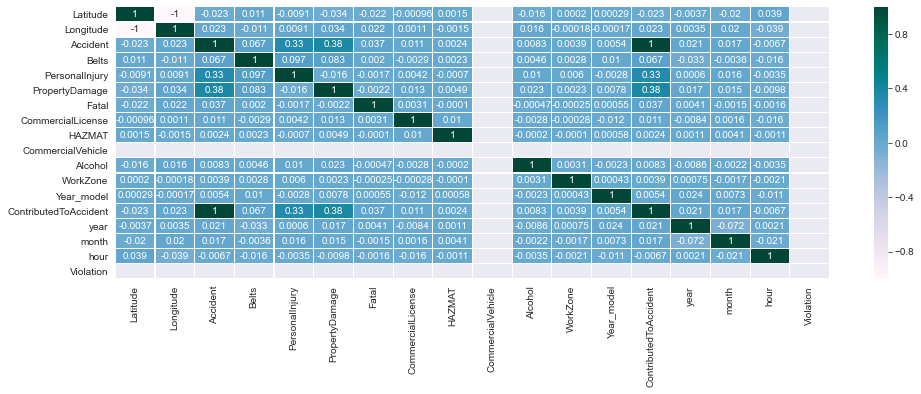

In [126]:
plt.figure(figsize = (16,5))
sns.heatmap(traffic_final.corr(), cmap='PuBuGn', annot=True,  linewidths=.1)